# <h1 align="center"><b>"Stop the Leak: Strategi Retensi Pelanggan Telco untuk Menyelamatkan Revenue di Q4"</b></h1>

## **1. Latar Belakang Masalah (Background)**

<div align='justify'>
Industri telekomunikasi saat ini sedang <b>Mengalami Masalah Tentang Perpindahan Pelanggan</b>. Dengan banyaknya kompetitor yang menawarkan perangkat lebih canggih dan harga bersaing, pelanggan jadi sangat mudah berpindah hati (<i>Churn</i>).
<br><br> Saat ini, perusahaan menghadapi masalah serius, kita kehilangan pelanggan setia bukan karena produk kita mati total, tapi karena hal-hal yang sebenarnya bisa dicegah seperti kualitas modem/perangkat yang ketinggalan zaman dan pelayanan teknisi yang kurang ramah.
<br><br> Jika ini dibiarkan menuju <b>Kuartal 4 (Q4)</b> masa di mana perang promo biasanya terjadi, perusahaan berisiko mengalami kebocoran pendapatan (<i>Revenue Loss</i>) yang jauh lebih besar. Kita perlu tahu siapa yang berpotensi pergi dan apa obatnya sebelum mereka benar-benar memutus layanan,  agar dapat mengurangi angka dari <i>Revenue Loss</i>.
</div>

<br>

## **2. Tujuan Proyek (Objectives)**

<div align='justify'>
Proyek analisis ini bertujuan untuk mengurangi angka kerugian karena <i>Churn</i> dan membantu tim <b>Retention & Customer Experience atau Marketing</b> dalam:

* 🎯 **Diagnosa Akar Masalah Churn**
    <br>Menemukan alasan utama kenapa pelanggan lari ke kompetitor (apakah harga, kualitas sinyal, atau layanan teknisi?).

* ⚠️ **Identifikasi Segmen "Siaga 1" (High Risk Segments)**
    <br>Mendeteksi kelompok pelanggan mana yang paling rawan pergi (berdasarkan Umur, Status Pernikahan, atau Skor Kepuasan) agar tim Marketing dapat melakukan targetasi yang presisi.

* 💡 **Rekomendasi Strategi Retensi**
    <br>Memberikan solusi konkret untuk mencegah churn, seperti program <i>upgrade</i> perangkat atau pelatihan <i>soft-skill</i> teknisi, demi mengamankan pendapatan bulanan perusahaan.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_demo = pd.read_excel('/content/drive/MyDrive/dataset/Telecommunications_Industry/Telco_customer_churn_demographics.xlsx')
df_location = pd.read_excel('/content/drive/MyDrive/dataset/Telecommunications_Industry/Telco_customer_churn_location.xlsx')
df_status = pd.read_excel('/content/drive/MyDrive/dataset/Telecommunications_Industry/Telco_customer_churn_status.xlsx')
df_population = pd.read_excel('/content/drive/MyDrive/dataset/Telecommunications_Industry/Telco_customer_churn_population.xlsx')
df_services = pd.read_excel('/content/drive/MyDrive/dataset/Telecommunications_Industry/Telco_customer_churn_services.xlsx')

# ***Data Transformation***

In [3]:
df_location['Zip Code'] = df_location['Zip Code'].astype('object')
df_status[['Churn Category', 'Churn Reason']] = df_status[['Churn Category', 'Churn Reason']].fillna('No Churn')
df_services['Offer'] = df_services['Offer'].fillna('No Offer')
df_services['Internet Type'] = df_services['Internet Type'].fillna('No Internet Service')
df_population['Zip Code'] = df_population['Zip Code'].astype('object')

# ***Exploratory Data Analysis (EDA)***

In [4]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [5]:
df_demo.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [6]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location ID  7043 non-null   object 
 1   Customer ID  7043 non-null   object 
 2   Count        7043 non-null   int64  
 3   Country      7043 non-null   object 
 4   State        7043 non-null   object 
 5   City         7043 non-null   object 
 6   Zip Code     7043 non-null   object 
 7   Lat Long     7043 non-null   object 
 8   Latitude     7043 non-null   float64
 9   Longitude    7043 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 550.4+ KB


In [7]:
df_location.head()

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [8]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      7043 non-null   object
 11  Churn Reason        7043 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


In [9]:
df_status.head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [10]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1671 non-null   int64 
 1   Zip Code    1671 non-null   object
 2   Population  1671 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.3+ KB


In [11]:
df_population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


## **Kondisi Saat Ini: Berapakah Persentase antara Customer Churned dengan yang tidak?**

In [12]:
df_status.groupby('Churn Label')['Customer ID'].count().apply(lambda x: f"{(x/df_status.shape[0])*100:.2f}%")

,Customer ID
Churn Label,
No,73.46%
Yes,26.54%


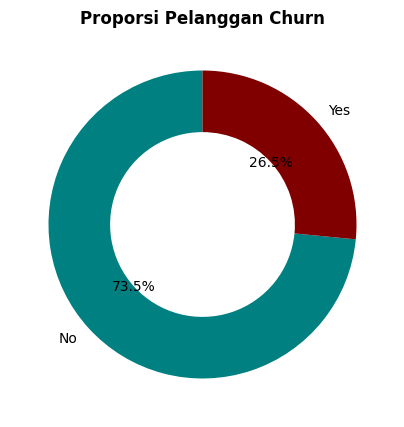

In [13]:
# @title **Churn Vs No Churn**
my_palette = {'Yes': '#800000', 'No': '#008080'}

data = df_status['Churn Label'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
        colors=[my_palette['No'], my_palette['Yes']],
        wedgeprops={'width': 0.4})
plt.title('Proporsi Pelanggan Churn', fontweight='bold')
plt.show()

***Insight: Churn Vs No Churn***

<div align='justify'>

Kondisi Perusahaan saat ini di Kuartal ke 3 (Q3: Juli-Sept) Pelanggan yang Memilih "Berpindah (Churn)" Lebih Sedikit daripada Pelanggan yang Masih Berlangganan **(Yes: 26.5%, No: 73.5%)**. Jika ini di diamkan, Jumlah Pelanggan akan mengalami Pengurangan dan Terdampak juga pasti ke Pendapatan Perusahaan.

Maka dari itu, Perusahaan harus mengurangi "Perpindahan Pelanggan", dan mungkin bisa memperluas cakupan pelanggan ke daerah-daerah yang belum pernah menjadi target marketing, Sebenarnya lebih untung menjaga "Pelanggan yang Setia dan Loyal" dengan menyelesaikan masalah-masalah yang dialami oleh Pelanggan yang memilih berhenti berlangganan daripada Akuisisi Pelanggan Baru yang biaya nya lebih besar untuk melakukan iklan, pemasaran, dan lain lain. Karena dengan memanfaatkan hubungan yang sudah ada dari hasil analisis dan tidak perlu mengeluarkan banyak uang untuk iklan, pemasaran, dan membangun kepercayaan dari awal, meskipun keduanya penting untuk pertumbuhan bisnis yang seimbang. Ini perlu dipertimbangkan kembali oleh Perusahaan.

</div>

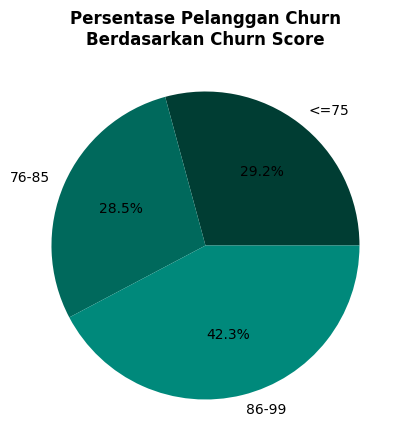

In [14]:
# @title **Distribusi Pelanggan Churn dari Scorenya**
low_churned = df_status.loc[(df_status['Churn Score'] <= 75) & (df_status['Churn Label'] == 'Yes')].shape[0]
middle_churned = df_status.loc[((df_status['Churn Score'] > 75) & (df_status['Churn Score'] <= 85)) & (df_status['Churn Label'] == 'Yes')].shape[0]
high_churned = df_status.loc[((df_status['Churn Score'] > 85) & (df_status['Churn Score'] <= 99)) & (df_status['Churn Label'] == 'Yes')].shape[0]

score_churned = pd.Series([low_churned, middle_churned, high_churned], index=['<=75', '76-85', '86-99'])

teal_colors = ['#003d33', '#00695c', '#00897b']

plt.figure(figsize=(10,5))
plt.pie(score_churned,
        labels=score_churned.index,
        autopct='%1.1f%%',
        colors=teal_colors)

plt.title('Persentase Pelanggan Churn\nBerdasarkan Churn Score', fontweight='bold')
plt.show()

In [15]:
print("Churn Score Terendah yang dimiliki Pelanggan Churn:")
df_status.loc[(df_status['Churn Score'] <= 75) & (df_status['Churn Label'] == 'Yes')]['Churn Score'].min()

Churn Score Terendah yang dimiliki Pelanggan Churn:


65

***Insight: Persentase Pelanggan Churn Berdasarkan Churn Score***

Pelanggan dengan Kategori Churn Score Paling Rendah (<=75) justru Berkontribusi Kedua pada tingkat Churn, ini berarti Pelanggan dengan Churn Score mulai dari 65-75 sudah harus di waspadai bahwa pelanggan tersebut sudah berpotensi Berhenti Berlangganan.

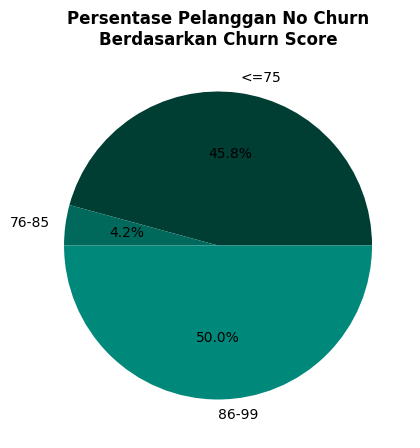

In [16]:
# @title **Distribusi Pelanggan No Churn dari Score nya**
low_no_churned = df_status.loc[(df_status['Churn Score'] <= 75) & (df_status['Churn Label'] == 'No')].shape[0]
middle_no_churned = df_status.loc[((df_status['Churn Score'] > 75) & (df_status['Churn Score'] <= 85)) & (df_status['Churn Label'] == 'No')].shape[0]
high_no_churned = df_status.loc[((df_status['Churn Score'] < 85) & (df_status['Churn Score'] <= 99)) & (df_status['Churn Label'] == 'No')].shape[0]

score_no_churned = pd.Series([low_no_churned, middle_no_churned, high_no_churned], index=['<=75', '76-85', '96'])

teal_colors = ['#003d33', '#00695c', '#00897b']

plt.figure(figsize=(10,5))
plt.pie(
    score_no_churned,
    labels=score_churned.index,
    autopct='%1.1f%%',
    colors=teal_colors)
plt.title('Persentase Pelanggan No Churn\nBerdasarkan Churn Score', fontweight='bold')
plt.show()

***Insight: Persentase Pelanggan No Churn Berdasarkan Churn Score***

Pelanggan dengan Churn Score 86-99 Memiliki Potensi Tertinggi untuk "Berpindah (Churn)" dan Ternyata ada 50% Pelanggan yang Masih Berlangganan memiliki Churn Score 85-99 yang perlu diwaspadai dan di atasi segera mungkin untuk menghindari peningkatan jumlah perpindahan pelanggan dan mengurangi kerugian pada perusahaan di tiap bulan nya.

In [17]:
# @title **Seberapa kuat hubungan Perusahaan dengan pelanggan?**
df_status['CLS'] = df_status['Satisfaction Score'] * (df_status['CLTV'] / 100)
df_status.groupby('Customer Status')['CLS'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,72.080984,40.799879,20.03,42.1400,57.25,97.95,194.52
Joined,454.0,161.134780,55.192875,62.55,119.3475,157.50,202.01,296.25
Stayed,4720.0,170.626818,56.003347,60.21,130.1100,166.29,207.45,324.20


In [18]:
df_status.columns

Index(['Status ID', 'Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'CLS'],
      dtype='object')

### Customer Churn Berdasarkan Kepuasan Pelanggan

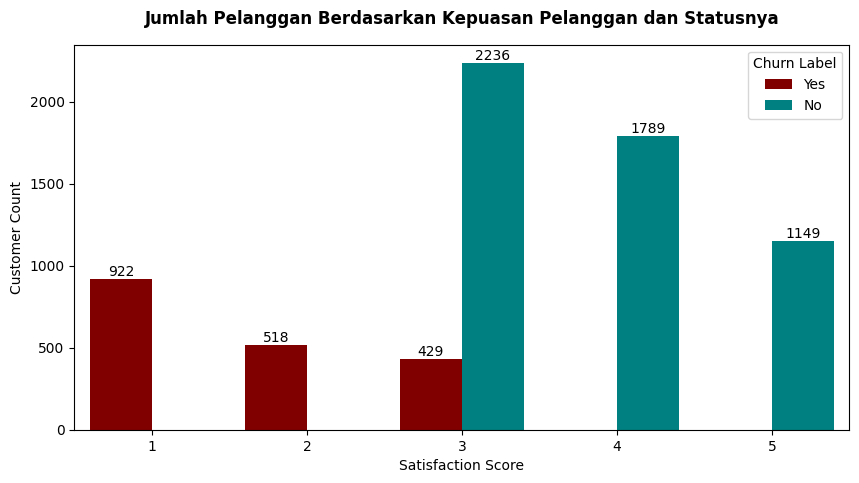

In [19]:
# @title **Tingkat Kepuasan pada Pelanggan**
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_status.pivot_table(index=['Churn Label', 'Satisfaction Score'], values='Customer ID', aggfunc='count'),
    x='Satisfaction Score',
    y='Customer ID',
    hue='Churn Label',
    palette=my_palette,
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan Berdasarkan Kepuasan Pelanggan dan Statusnya', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan Berdasarkan Kepuasan Pelanggan dan Statusnya***

- Sudah Jelas, Pelanggan yang memilih "Berpindah (Churn)" itu karena adanya Ketidakpuasan ketika berlangganan.
- Selain itu, ada sebesar 2236 Pelanggan yang Berpotensi Berhenti Berlangganan (Satisfaction Score = 3) yang patut di waspadai dan Pelanggan yang Memiliki Skor Kepuasan = 3 harus di fokuskan untuk strategi Retensi untuk mengurangi Tingkat Churn.

**Kesimpulan**: Pelanggan dengan Skor Kepuasan = 3 Perlu di fokuskan untuk Strategi Retensi karena Berpotensi Besar Meningkatkan Tingkat Churn.

## **Berdasarkan Demografi Customer, Siapa saja Customer Yang Churn?**

In [20]:
demo_status = pd.merge(df_demo, df_status, on='Customer ID').drop(columns=['Count_x', 'Count_y'])
demo_status.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Status ID,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,CLS
0,8779-QRDMV,Male,78,No,Yes,No,No,0,SWSORB1252,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,162.99
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,SNAEQA8572,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,159.06
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,LMBQNN3714,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,63.58
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,VRZYZI9978,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,106.74
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,FDNAKX1688,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,55.86


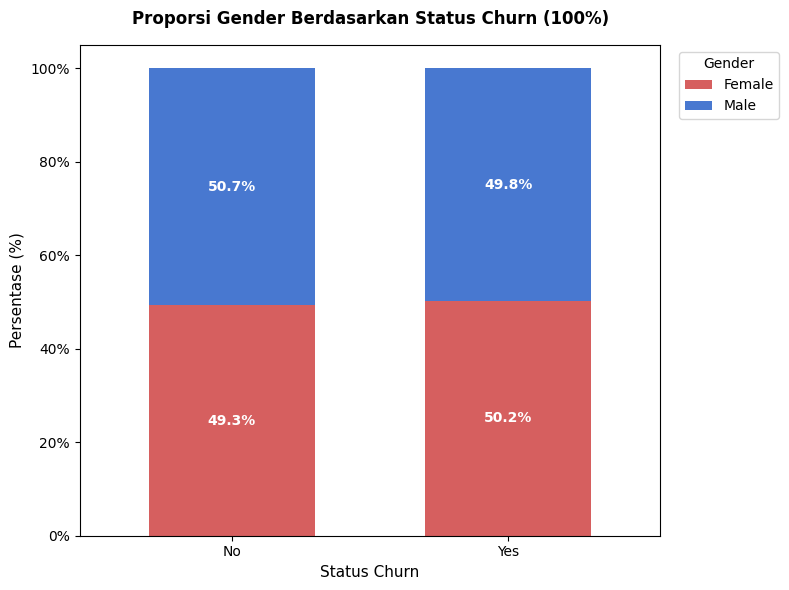

In [21]:
# @title **Distribusi Jenis Kelamin Pelanggan**

cross_tab = demo_status.pivot_table(index='Churn Label', columns='Gender', values='Customer ID', aggfunc='count')
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))

cross_tab_prop.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#d65f5f', '#4878d0'],
    width=0.6,
    rot=0
)

ax.set_title('Proporsi Gender Berdasarkan Status Churn (100%)', fontweight='bold', pad=15)
ax.set_xlabel('Status Churn', fontsize=11)
ax.set_ylabel('Persentase (%)', fontsize=11)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for container in ax.containers:
    labels = [f'{val.get_height():.1f}%' if val.get_height() > 0 else '' for val in container]

    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold',
        fontsize=10
    )

ax.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

***Insight: Jumlah Pelanggan Berdasarkan Gender dan Status Churn Vs No Churn***

Pelanggan kita mayoritas adalah Laki-laki, tetapi Pelanggan Churn Wanita sedikit Lebih banyak dari Laki-Laki

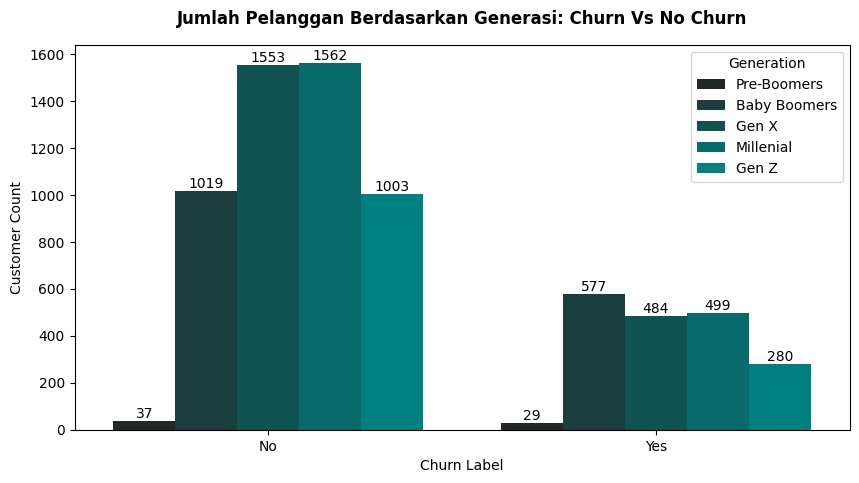

In [22]:
# @title **Pelanggan dari Lintas Generasi**
gen_boomers = df_demo.loc[((df_demo['Age'] >= (2025-1964)) & (df_demo['Age'] <= (2025-1946)))]  # GEN BABY BOOMERS --> TAHUN KELAHIRAN 1946-1964
gen_x = df_demo.loc[(df_demo['Age'] >= (2025-1980)) & (df_demo['Age'] <= (2025-1965))]          # GEN X --> TAHUN KELAHIRAN 1965-1980
gen_millenial = df_demo.loc[(df_demo['Age'] >= (2025-1996)) & (df_demo['Age'] <= (2025-1981))]  # GEN MILLENIAL --> TAHUN KELAHIRAN 1981-1996
gen_z = df_demo.loc[(df_demo['Age'] >= (2025-2012)) & (df_demo['Age'] <= (2025-1997))]          # GEN Z --> TAHUN KELAHIRAN 1997-2012

demo_status['Generation'] = demo_status['Customer ID'].apply(lambda x:
                                                           'Gen Z' if x in gen_z['Customer ID'].values else
                                                           'Millenial' if x in gen_millenial['Customer ID'].values else
                                                           'Gen X' if x in gen_x['Customer ID'].values else
                                                           'Baby Boomers' if x in gen_boomers['Customer ID'].values else 'Pre-Boomers')

urutan_generasi = ['Pre-Boomers', 'Baby Boomers', 'Gen X', 'Millenial', 'Gen Z']

plt.figure(figsize=(10,5))
sns.barplot(
    data=demo_status.pivot_table(index=['Churn Label', 'Generation'], values='Customer ID', aggfunc='count').reindex(urutan_generasi, level='Generation'),
    x='Churn Label',
    y='Customer ID',
    hue='Generation',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan Berdasarkan Generasi: Churn Vs No Churn', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan Berdasarkan Generasi: Churn vs No Churn***

- Pelanggan dari Generasi Millenial dan Gen X berkontribusi besar bagi perusahaan karena mayoritas Pelanggan dari Generasi tersebut dan mereka juga memiliki tingkat Churn tertinggi kedua dan ketiga.
- Walaupun Generasi Baby Boomers tidak sebanyak Millenials dan Gen X, Tingkat Churn nya Paling Tinggi.

**Kesimpulan:**
- Pertahankan Pelanggan Millenials dan Gen X dengan menjadikannya target dari strategi retensi untuk mempertahankan pelanggan yang berkontribusi banyak bagi perusahaan sekaligus menurunkan tingkat Churn.
- Baby Boomers juga perlu di pertahankan karena memiliki tingkat Churn Tertinggi yang bisa jadi di kuartal Selanjutnya bisa Lebih banyak lagi dari Generasi Baby Boomers


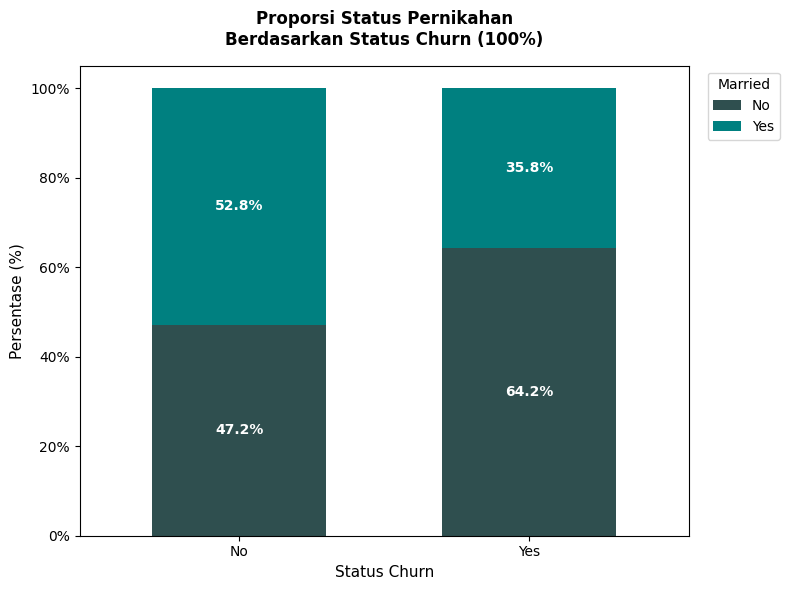

In [23]:
# @title **Status Pernikahan dari Para Pelanggan**
cross_tab = demo_status.pivot_table(index='Churn Label', columns='Married', values='Customer ID', aggfunc='count')
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))

cross_tab_prop.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['darkslategray', 'teal'],
    width=0.6,
    rot=0
)

ax.set_title('Proporsi Status Pernikahan\nBerdasarkan Status Churn (100%)', fontweight='bold', pad=15)
ax.set_xlabel('Status Churn', fontsize=11)
ax.set_ylabel('Persentase (%)', fontsize=11)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for container in ax.containers:
    labels = [f'{val.get_height():.1f}%' if val.get_height() > 0 else '' for val in container]

    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold',
        fontsize=10
    )

ax.legend(title='Married', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

***Insight: Jumlah Pelanggan Berdasarkan Status Pernikahan: Churn Vs No Churn***

- Pelanggan yang sudah Menikah Lebih banyak Berkontribusi pada Perusahaan daripada yang belum Menikah.
- Tetapi, Justru malah Yang Belum Menikah yang memiliki tingkat Churn Tertinggi dari yang Sudah Menikah.


**Kesimpulan:**

Pelanggan yang sudah Menikah akan Lebih Mementingkan Kebutuhan lain untuk keluarga daripada memikirkan untuk berhenti berlangganan. Kalau Pelanggan yang belum menikah akan lebih fleksibel dan mudah berhenti, karena mereka belum memikirkan kebutuhan kebutuhan lain.

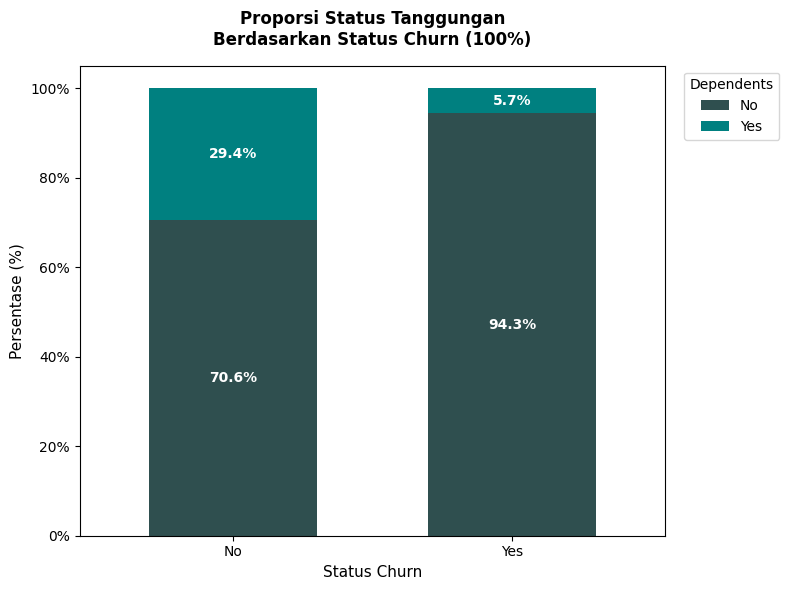

In [24]:
# @title **Apakah Pelanggan yang Belum ada Tanggungan Mudah Memilih Untuk Pergi?**
cross_tab = demo_status.pivot_table(index='Churn Label', columns='Dependents', values='Customer ID', aggfunc='count')
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))

cross_tab_prop.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['darkslategray', 'teal'],
    width=0.6,
    rot=0
)

ax.set_title('Proporsi Status Tanggungan\nBerdasarkan Status Churn (100%)', fontweight='bold', pad=15)
ax.set_xlabel('Status Churn', fontsize=11)
ax.set_ylabel('Persentase (%)', fontsize=11)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for container in ax.containers:
    labels = [f'{val.get_height():.1f}%' if val.get_height() > 0 else '' for val in container]

    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold',
        fontsize=10
    )

ax.legend(title='Dependents', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

***Insight: Apakah Pelanggan yang Belum Memiliki Tanggungan Mudah Memilih Untuk Pergi?***

- 94.3% Pelanggan Churn yang Belum Memiliki Tanggungan Masih Fleksibel, sehingga mudah sekali untuk memutuskan berhenti berlangganan.

**Kesimpulan:**

Karena Pelanggan yang Belum memilki Tanggungan ini lebih memikirkan Kualitas Produk nya karena tidak ada pikiran untuk biaya kebutuhan lain seperti anak, maka bisa melakukan Peningkatan Kualitas Produk melalui Peningkatan Perangkat yang dipakai, Peningkatan Customer Service, dan Penawaran yang lebih menarik.

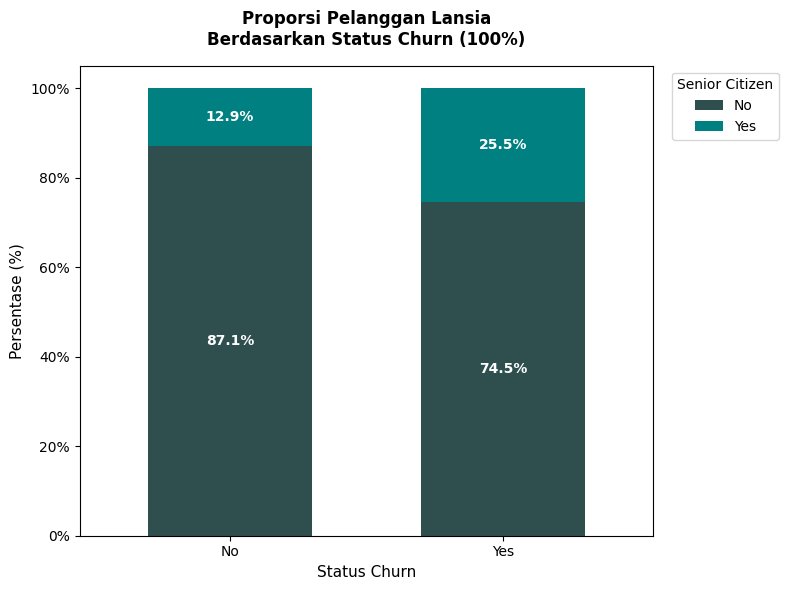

In [25]:
# @title **Apakah Pelanggan Lansia Mudah Memilih Untuk Pergi?**
cross_tab = demo_status.pivot_table(index='Churn Label', columns='Senior Citizen', values='Customer ID', aggfunc='count')
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))

cross_tab_prop.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['darkslategray', 'teal'],
    width=0.6,
    rot=0
)

ax.set_title('Proporsi Pelanggan Lansia\nBerdasarkan Status Churn (100%)', fontweight='bold', pad=15)
ax.set_xlabel('Status Churn', fontsize=11)
ax.set_ylabel('Persentase (%)', fontsize=11)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for container in ax.containers:
    labels = [f'{val.get_height():.1f}%' if val.get_height() > 0 else '' for val in container]

    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold',
        fontsize=10
    )

ax.legend(title='Senior Citizen', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

***Insight: Proporsi Pelanggan Lansia Berdasarkan Status Churn***

- Porsi Pelanggan Lansia yang Churn **(25.5%)** hampir 2 kali lipat lebih besar dibandingkan porsi Pelanggan Lansia yang masih bertahan **(12.9%)**
- Walaupun Pelanggan yang bukan Lansia berkontribusi tinggi pada tingkat Churn sebesar **74.5%**, dan yang tidak berpindah Sebesar **87.1%**. Tetapi, tidak berkorelasi kuat dengan tingkat Churn daripada Pelanggan Lansia.  

**Kesimpulan:**

Terdapat korelasi positif antara status Senior Citizen dengan tingkat Churn. Pelanggan lansia memiliki risiko lebih tinggi untuk meninggalkan layanan dibandingkan pelanggan yang lebih muda. Ini menunjukkan bahwa produk atau layanan saat ini mungkin kurang ramah atau kurang relevan bagi demografi usia lanjut.

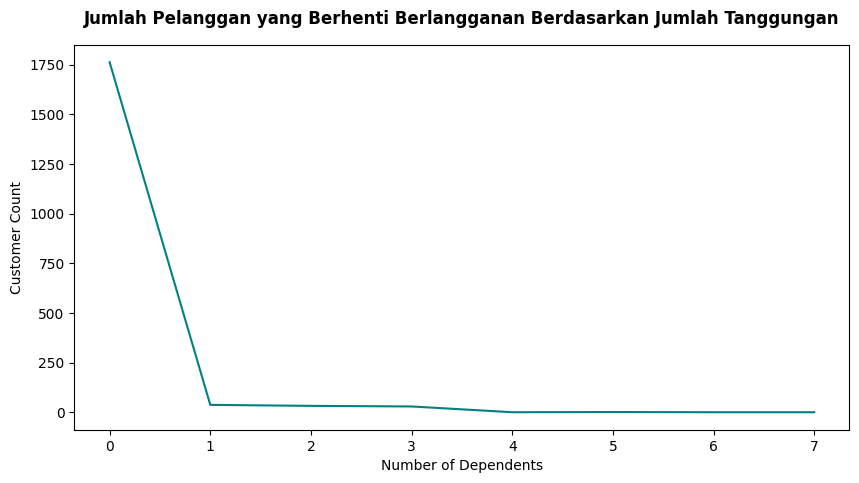

In [26]:
# @title **Jumlah Tanggungan Pelanggan Churn**
plt.figure(figsize=(10,5))
sns.lineplot(
    data=demo_status.loc[
        (demo_status['Churn Label'] == 'Yes')
    ].pivot_table(index='Number of Dependents', values='Customer ID', aggfunc='count'),
    x='Number of Dependents',
    y='Customer ID',
    color='teal')

plt.title('Jumlah Pelanggan yang Berhenti Berlangganan Berdasarkan Jumlah Tanggungan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Number of Dependents')
plt.xticks(np.arange(0,8,1))
plt.show()

***Insight: Jumlah Pelanggan yang Berhenti Berlangganan Berdasarkan Jumlah Tanggungan***

Sudah dipastikan bahwa Tingkat Churn Yang tinggi Mayoritas Diisi oleh Pelanggan yang belum Memiliki Tanggungan

**Kesimpulan:** Berdasarkan Generasi, Status Pernikahan, dan Tanggungan, Pelanggan yang memilih untuk berhenti berlangganan berasal dari generasi Baby Boomers dan Millenial. Selain itu, berasal dari yang belum memiliki tanggungan, dan belum menikah juga.

Sedangkan, Pelanggan yang perlu dipertahankan adalah pada Pelanggan yang termasuk Generasi Millenial, dan Gen X, karena Keduanya Memiliki Kontribusi Tertinggi dan tingkat Churn tertinggi ke 2 dan 3.

### Berdasarkan Demografi, Segmen Demografi Customer mana yang memiliki Tingkat Revenue dan Tingkat Churn nya yang Tinggi?

In [27]:
services_demo_status = pd.merge(df_services, demo_status, on='Customer ID')
services_demo_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter_x                          7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

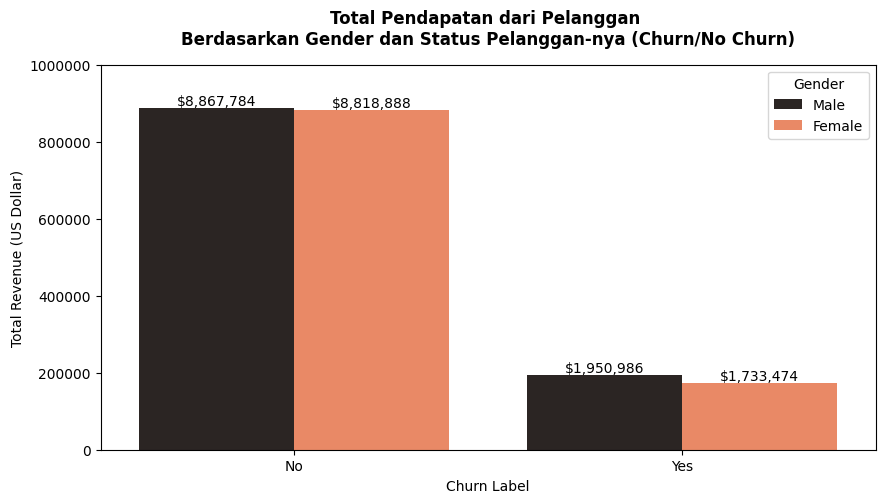

In [28]:
# @title **Jenis Kelamin Tidak menjadi Pembeda yang Signifikan**
plt.figure(figsize=(10,5))
sns.barplot(data=services_demo_status.pivot_table(index=['Churn Label', 'Gender'], values='Total Revenue', aggfunc='sum').sort_values(by='Total Revenue', ascending=False),
            x='Churn Label',
            y='Total Revenue',
            hue='Gender',
            palette='dark:coral')

for container in plt.gca().containers:
  plt.bar_label(container, fmt='${:,.0f}')

plt.title('Total Pendapatan dari Pelanggan \nBerdasarkan Gender dan Status Pelanggan-nya (Churn/No Churn)', pad=15, fontweight='bold')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10).astype(int))
plt.ylabel('Total Revenue (US Dollar)')
plt.show()

***Insight: Total Pendapatan dari Pelanggan Berdasarkan Gender dan Churn/No Churn***

Rasio Kehilangan Revenue:
- Pria: Dari Total Revenue **~\$10.8 Juta**, Perusahaan Kehilangan **~5%** dari Total Revenue
- Wanita: Dari Total Revenue **~\$10.5 Juta**, Perusahaan Kehilangan **~6%** dari Total Revenue

**Kesimpulan:**

- Jenis Kelamin tidak menjadi pembeda yang signifikan dalam kontribusi pendapatan. Keduanya memiliki perilaku belanja yang hampir sama.
- Tetapi, karena tingkat Churn dari Pelanggan Pria sedikit lebih tinggi dari Pelanggan Wanita, perlu di breakdown lagi apakah ada layanan tertentu yang kurang memuaskan bagi pelanggan Pria.
- Keduanya harus jadi fokus utama dalam menjaga Pelanggan agar menurunkan tingkat Churn.

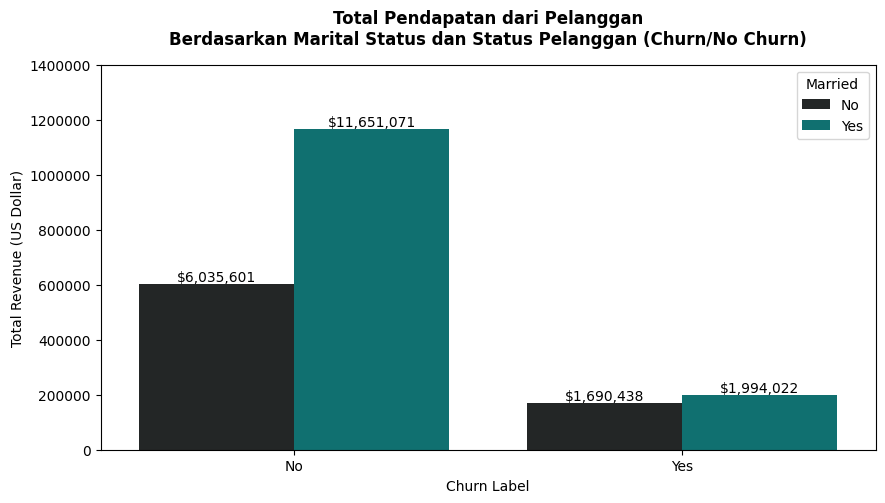

In [29]:
# @title **Singles Lebih Berisiko**
plt.figure(figsize=(10,5))
sns.barplot(data=services_demo_status.pivot_table(index=['Churn Label', 'Married'], values='Total Revenue', aggfunc='sum'),
            x='Churn Label',
            y='Total Revenue',
            hue='Married',
            palette='dark:teal')

for container in plt.gca().containers:
  plt.bar_label(container, fmt='${:,.0f}')

plt.title('Total Pendapatan dari Pelanggan\nBerdasarkan Marital Status dan Status Pelanggan (Churn/No Churn)', pad=15, fontweight='bold')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10).astype(int))
plt.ylabel('Total Revenue (US Dollar)')
plt.show()

***Insight: Singles Lebih Berisiko***

Rasio Kehilangan Revenue:

- Single: Dari total revenue **\$~7,7 Juta (\$6M retained + \$1,7M churn)**, perusahaan kehilangan **~22%**.

- Married: Dari total revenue **~\$13,6 Juta**, perusahaan kehilangan ~**14%**.

**Kesimpulan:** Meskipun total uang yang hilang dari kelompok Married terlihat besar **(\$1,9 Juta)**, itu karena basis pelanggannya memang besar. Namun secara proporsi, kelompok Single jauh lebih rapuh dan mudah pergi.

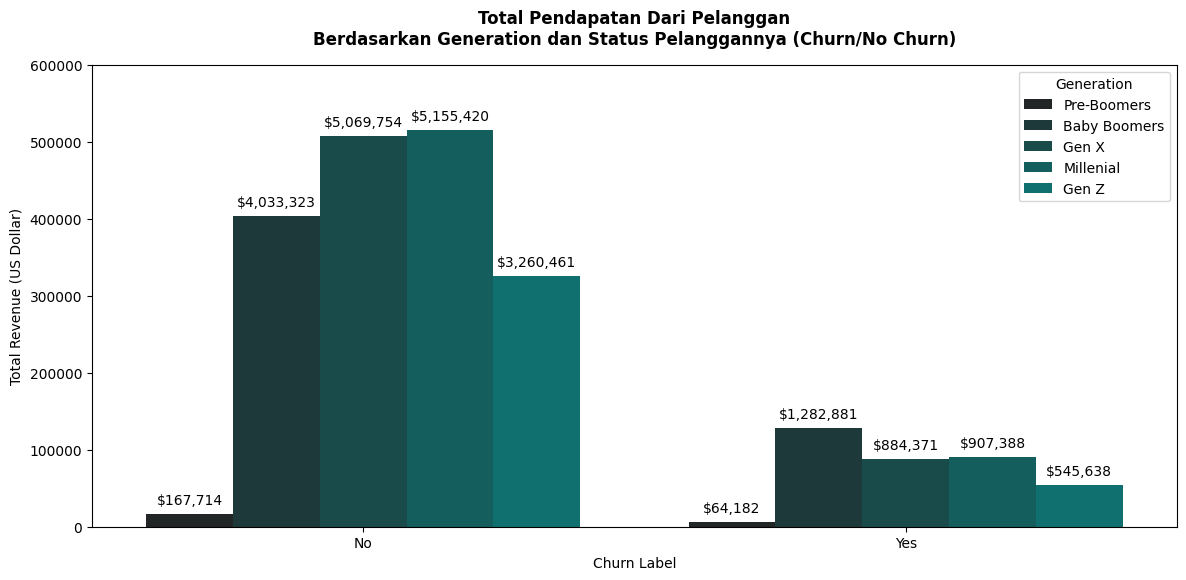

In [30]:
# @title **Boomers dengan Tingkat Churn Tertinggi, Millennials Penyumbang Revenue Terbesar**
plt.figure(figsize=(14,6))
sns.barplot(data=services_demo_status.pivot_table(index=['Churn Label', 'Generation'], values='Total Revenue', aggfunc='sum').reindex(urutan_generasi, level='Generation'),
            x='Churn Label',
            y='Total Revenue',
            hue='Generation',
            palette='dark:teal'
            )

for container in plt.gca().containers:
  plt.bar_label(container, fmt='${:,.0f}', padding=5)

plt.title('Total Pendapatan Dari Pelanggan\nBerdasarkan Generation dan Status Pelanggannya (Churn/No Churn)', pad=15, fontweight='bold')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10).astype(int))
plt.ylabel('Total Revenue (US Dollar)')
plt.show()

***Insight: Boomers dengan Tingkat Churn Tertinggi, Millennials Penyumbang Revenue Terbesar***

- Baby Boomers (High Risk, High Loss): Ini adalah generasi yang menyumbang kerugian terbesar secara nominal (**$1,2 Juta hilang**). Mengingat Boomers biasanya kurang teknis dibanding Gen Z, kemungkinan mereka churn karena masalah harga (kemahalan) atau layanan pelanggan yang buruk, bukan karena ingin mencoba teknologi baru kompetitor.

- Millennials (High Revenue): Mereka adalah penyumbang revenue terbesar yang berhasil dipertahankan (**$5,1 Juta**). Menjaga kepuasan hati Millennials adalah kunci stabilitas arus kas perusahaan.

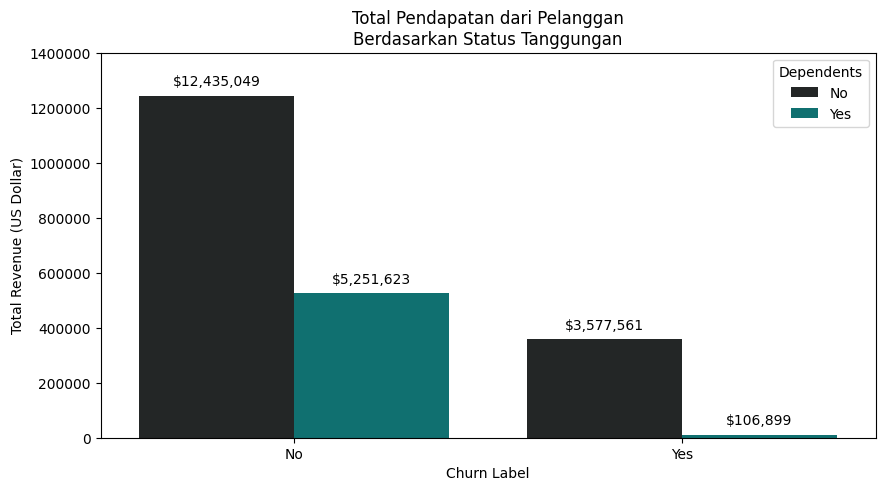

In [31]:
# @title **"Dependents" adalah Jangkar Loyalitas Terkuat**
plt.figure(figsize=(10,5))
sns.barplot(data=services_demo_status.pivot_table(index=['Churn Label', 'Dependents'], values='Total Revenue', aggfunc='sum'),
            x='Churn Label',
            y='Total Revenue',
            hue='Dependents',
            palette='dark:teal'
            )

for container in plt.gca().containers:
  plt.bar_label(container, fmt='${:,.0f}', padding=5)

plt.title('Total Pendapatan dari Pelanggan\nBerdasarkan Status Tanggungan')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10).astype(int))
plt.ylabel('Total Revenue (US Dollar)')
plt.show()

***Insight: "Dependents" adalah Jangkar Loyalitas Terkuat***

- Revenue yang Hilang dari Kelompok "No Dependents" Sangat Masif, Perusahaan kehilangan pendapatan sebesar **\$3,5 Juta** dari orang yang tidak punya tanggungan.

- Kelompok "With Dependents" Hampir Tidak Ada yang Pergi, Revenue yang hilang dari kelompok yang punya tanggungan hanya **\$106 Ribu**. Ini angka yang sangat kecil jika dibandingkan dengan total revenue mereka (5,2 Juta USD).

**Kesimpulan**:

Pelanggan yang Tidak Memiliki Tanggungan masih sangat Fleksibel dan masih merasa bebas dalam memilih produk dari perusahaan mana yang lebih baik, karena belum terbebani oleh Biaya-Biaya seluruh kebutuhan Anak.

Memiliki tanggungan (anak/orang tua) adalah faktor retensi alami terkuat. Begitu pelanggan masuk ke fase hidup ini, mereka menjadi sangat sticky (sulit pindah).

## **Kenapa Mereka Pergi: Apa Mayoritas Alasan yang Di ungkapkan Pelanggan Churn?**

In [32]:
df_status.pivot_table(index='Churn Category', values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[1::]

,Customer ID
Churn Category,
Competitor,841
Attitude,314
Dissatisfaction,303
Price,211
Other,200


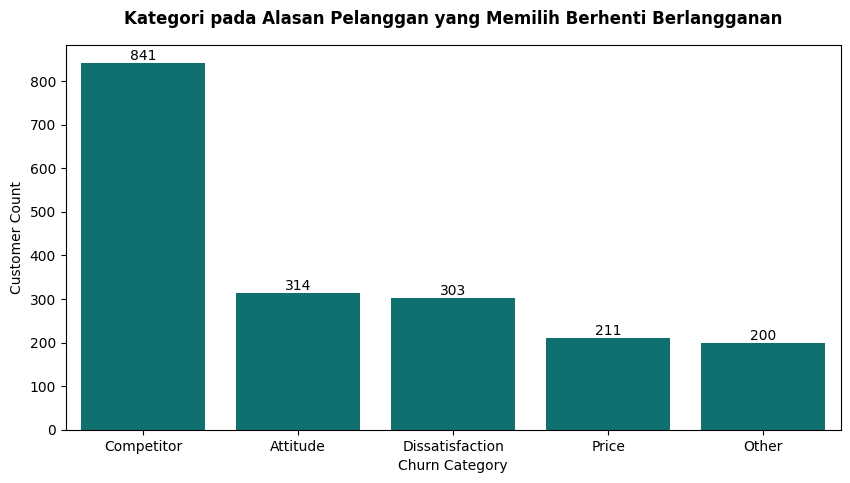

In [33]:
# @title **Kompetitor "Berhasil" Menarik Pelanggan Kita**
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_status.pivot_table(index='Churn Category', values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[1::],
    x='Churn Category',
    y='Customer ID',
    color='teal')

plt.title('Kategori pada Alasan Pelanggan yang Memilih Berhenti Berlangganan', pad=15, fontweight='bold')
plt.bar_label(plt.gca().containers[0])
plt.ylabel('Customer Count')
plt.show()

***Insight: Kategori pada Alasan Pelanggan yang Memilih Berhenti Berlangganan***

Kompertitor adalah kategori alasan utama Mengapa Pelanggan memutuskan untuk pergi atau berhenti berlangganan. Bisa jadi **Pelayanan** ke Pelanggannya lebih bagus, **Penawarannya** lebih menarik, **Produk** nya lebih bagus dan sedikit **lebih murah**, atau sering melakukan **Promo** (Jawabannya ada di Data Selanjutnya).

In [34]:
df_status.pivot_table(index=['Churn Category', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[1::]

Customer ID
Churn Category  Churn Reason                                          
Competitor      Competitor had better devices                      313
                Competitor made better offer                       311
Attitude        Attitude of support person                         220
Other           Don't know                                         130
Competitor      Competitor offered more data                       117
                Competitor offered higher download speeds          100
Attitude        Attitude of service provider                        94
Price           Price too high                                      78
Dissatisfaction Product dissatisfaction                             77
                Network reliability                                 72
Price           Long distance charges                               64
Dissatisfaction Service dissatisfaction                             63
Other           Moved                                               46
Price           Extra data charges                                  39
Dissatisfaction Limited range of services                           37
Price           Lack of affordable download/upload speed            30
Dissatisfaction Lack of self-service on Website                     29
Other           Poor expertise of online support                    18
Dissatisfaction Poor expertise of online support                    13
                Poor expertise of phone support                     12
Other           Deceased                                             6

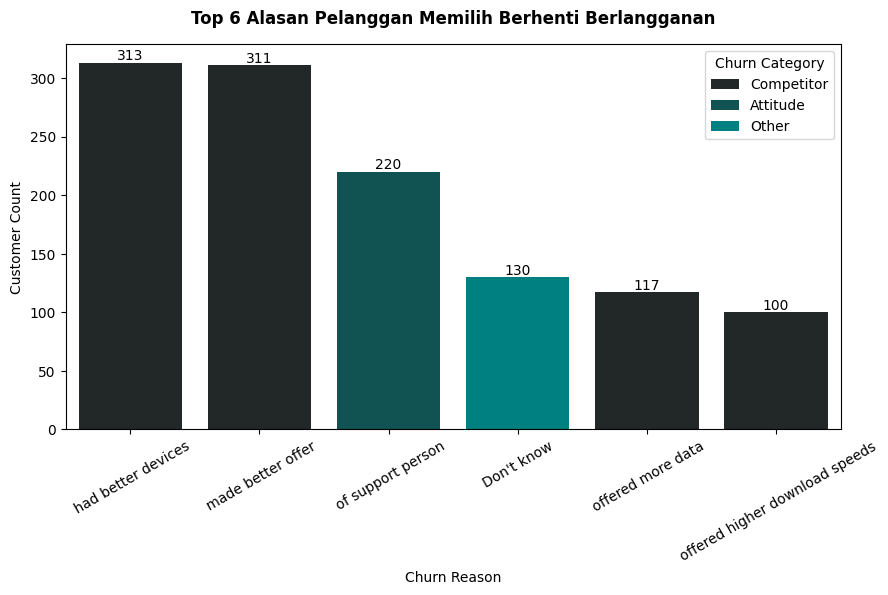

In [35]:
# @title **TOP 6 ALASAN PELANGGAN CHURN**
df_status2 = df_status.copy()
reason_category = list(df_status['Churn Category'].unique())[0:5]

for i in reason_category:
  df_status2['Churn Reason'] = df_status2['Churn Reason'].apply(lambda x: x.replace(i, ''))

plt.figure(figsize=(10,5))
sns.barplot(
    data=df_status2.pivot_table(index=['Churn Category', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[1:7],
    x='Churn Reason',
    y='Customer ID',
    hue='Churn Category',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Top 6 Alasan Pelanggan Memilih Berhenti Berlangganan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xticks(rotation=30)
plt.show()

***Insight: Top 6 Alasan Pelanggan Berhenti Berlangganan***

- Kompetitor Berhasil Menarik Pelanggan kita dengan Strategi Penawarannya yang Lebih Menarik dan selain itu mereka juga memiliki kualitas Perangkat yang lebih memadai dan bagus, yang pasti itu akan diikuti dengan kualitas prorduk nya juga.

- Pelayanan yang buruk pada teknisi kita juga menjadi alasan para pelanggan tidak betah pada layanan yang kita berikan

**Kesimpulan:**
- Meningkatkan Kualitas Produk lewat **Upgrade Device** seperti Router atau Perangkat lainnya disertakan dengan Penawaran yang Lebih Up to Date dengan Tren saat ini juga dapat menahan Tingkat Churn.
- Meningkatkan Kualitas Pelayanan dengan mengadakan pelatihan teknisi untuk meningkatkan kesadaran Empati dan Attitude nya, atau bisa juga Memperketat Tes pada Teknisi yang baru dengan menyertakan Attitude Test untuk mengukur seberapa baik Sikap Teknisi Tersebut
- Penawaran tersebut bisa menampilkan Bukti Kebaruan yang dilakukan untuk membuktikan layanan kita lebih baik.


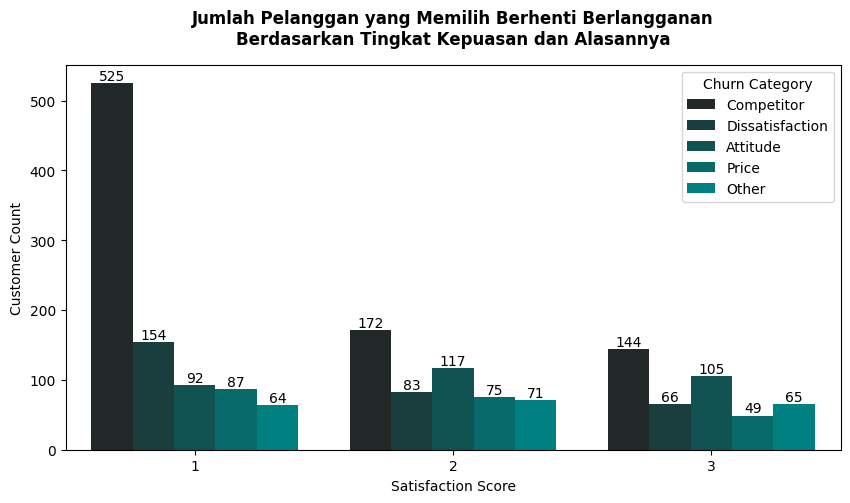

In [36]:
# @title **Alasan dan Skor Kepuasannya: Kompetitor**
data = df_status.loc[
    df_status['Churn Label'] == 'Yes',
].pivot_table(index=['Satisfaction Score', 'Churn Category'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(
    data=data,
    x='Satisfaction Score',
    y='Customer ID',
    hue='Churn Category',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Memilih Berhenti Berlangganan\nBerdasarkan Tingkat Kepuasan dan Alasannya', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan yang memilih Berhenti Berlangganan Berdasarkan Skor Kepuasan dan Alasannya***

Fenomena Perpindahan Pelanggan itu bisa terjadi karena adanya Kompetitor yang memiliki Produk lebih bagus, Ketidakpuasan Pelanggan, Pelayanan, dan Harga. Mayoritas Pelanggan yang memilih "Berpindah" beralasan kalau Kompetitor itu Memiliki Perangkat yang lebih Bagus dan Penawaran Promo Produk yang Lebih bagus juga. Yang berarti, Perusahaan bisa melakukan pengecekan pada kualitas perangkat yang dipakai, dan membuat penawaran yang lebih baik dan akurat.

**Kesimpulan:**

Peningkatkan Kualitas Produk lewat **Upgrade Device** Harus dilakukan disertakan dengan Penawaran yang Lebih Up to Date atau Menyesuaikan Target Pelanggan dari Demografinya. Peningkatkan Kualitas Pelayanan juga harus dilakukan, yaitu bisa dengan mengadakan pelatihan teknisi, atau bisa juga Memperketat Tes pada Teknisi yang baru dengan menyertakan Attitude Test . Setelah itu, kita bisa langsung membuat Penawaran dengan menampilkan Bukti Kebaruan yang dilakukan untuk membuktikan layanan kita lebih baik.

## **Apakah Customer Cenderung Lebih banyak Berpindah karena Layanan Tertentu?**

### Layanan Telepon

In [37]:
services_status = pd.merge(df_services, df_status, on='Customer ID').drop(columns=['Count_x', 'Count_y','Quarter_x', 'Quarter_y'])
services_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Referred a Friend                  7043 non-null   object 
 3   Number of Referrals                7043 non-null   int64  
 4   Tenure in Months                   7043 non-null   int64  
 5   Offer                              7043 non-null   object 
 6   Phone Service                      7043 non-null   object 
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   object 
 9   Internet Service                   7043 non-null   object 
 10  Internet Type                      7043 non-null   object 
 11  Avg Monthly GB Download            7043 non-null   int64

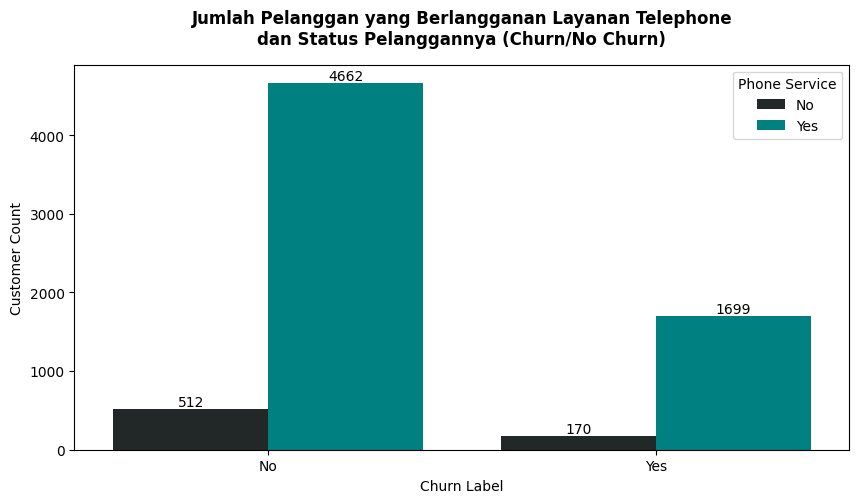

In [38]:
# @title **Dominasi Pengguna Layanan Telepon dan Resiko Churn**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Phone Service'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Phone Service',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Telephone\ndan Status Pelanggannya (Churn/No Churn)', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan yang Berlangganan Layanan Telephone dan Status Pelanggannya (Churn/No Churn)***

- Volume Mayoritas: Sebagian besar pelanggan perusahaan adalah pengguna layanan telepon. Terdapat 4.662 pelanggan setia dan 1.699 pelanggan yang churn di kategori ini.

Tingkat Churn yang Serupa:
- Pengguna Telepon: ~26,7% (1699 dari total 6361).
- Bukan Pengguna Telepon: ~24,9% (170 dari total 682).

**Kesimpulan:** Meskipun persentase churn antara pengguna telepon dan non-telepon tidak berbeda jauh, dampak absolut dari hilangnya pengguna telepon jauh lebih besar bagi bisnis. Fokus strategi retensi harus diprioritaskan pada segmen pengguna telepon karena volumenya yang masif.

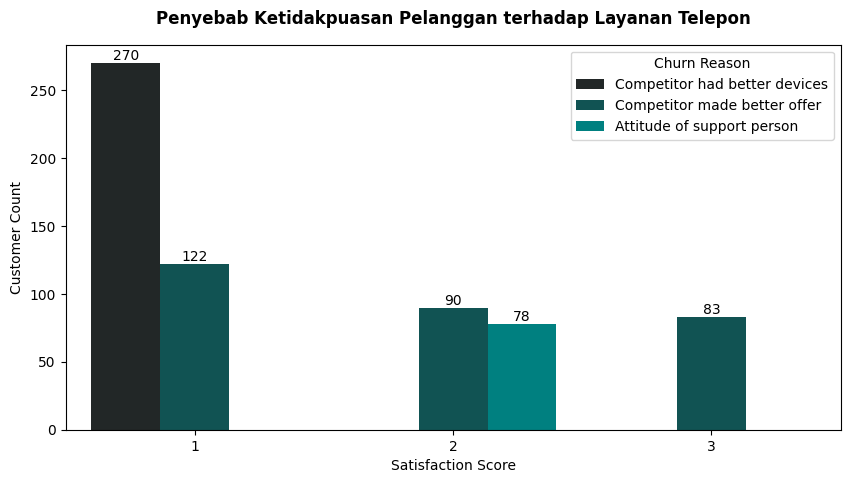

In [39]:
# @title **Penyebab Utama Pelanggan Layanan Telepon Pergi**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.loc[
      (services_status['Phone Service'] == 'Yes') &
      (services_status['Churn Label'] == 'Yes')
      ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').fillna(0).astype('int').sort_values(by='Customer ID', ascending=False)[0:5],

    x='Satisfaction Score',
    y='Customer ID',
    hue='Churn Reason',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Pelanggan terhadap Layanan Telepon', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan Pelanggan Terhadap Layanan Telepon***

- **Zona Bahaya (Satisfaction Score = 1)**: Kelompok pelanggan yang memberikan nilai kepuasan terendah (skor 1) adalah penyumbang churn terbesar. Alasan utamanya didominasi oleh faktor eksternal:

    - Perangkat Kompetitor Lebih Baik: Sebanyak 270 pelanggan pergi karena alasan ini.

    - Penawaran Kompetitor Lebih Baik: Sebanyak 122 pelanggan pergi karena tawaran pesaing.

- **Masalah Layanan Internal (Satisfaction Score = 2):** Pada pelanggan dengan skor kepuasan 2, mulai muncul masalah internal, yaitu "Attitude of support person" (Sikap staf pendukung) yang menyebabkan 78 pelanggan pergi.

**Kesimpulan:** Perusahaan kalah bersaing dari sisi produk (perangkat) dan harga (penawaran) di mata pelanggan yang sangat tidak puas. Namun, untuk pelanggan yang "agak tidak puas" (skor 2), perbaikan kualitas SDM (support) bisa mencegah mereka pergi.

### Layanan Internet

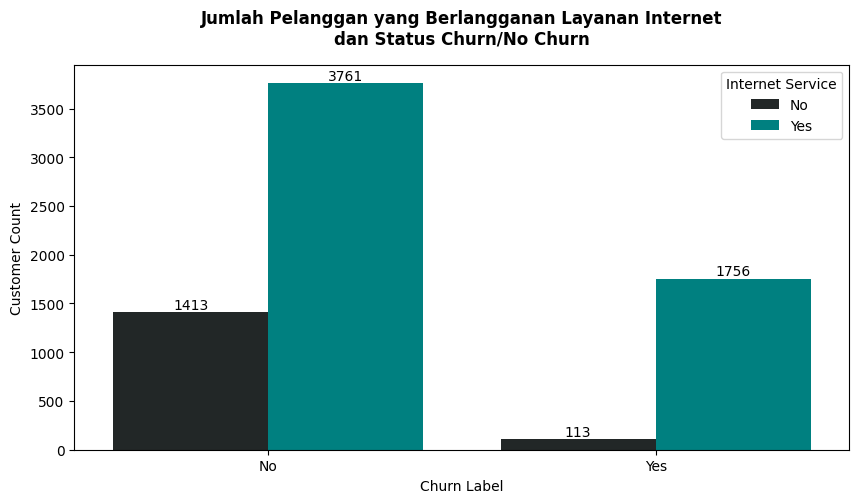

In [40]:
# @title **Layanan Internet adalah Titik Penyebab Utama**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Internet Service'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Internet Service',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Internet\ndan Status Churn/No Churn', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan yang Berlangganan Layanan Internet dan Status Churn/No Churn***

terlihat perbedaan risiko yang sangat mencolok antara pelanggan yang menggunakan internet dan yang tidak:

- Risiko Churn Tinggi pada Pengguna Internet: Dari total pengguna internet, sebanyak 1.756 orang melakukan churn. Tingkat churn di segmen ini mencapai sekitar 31,8%.

- Stabilitas pada Non-Internet: Pelanggan yang tidak mengambil paket internet justru sangat setia. Hanya 113 orang yang churn dari total 1.526 pelanggan (tingkat churn hanya ~7,4%).

**Key Insight**: Masalah retensi pelanggan perusahaan ini berpusat pada produk Internet, bukan layanan dasar lainnya.

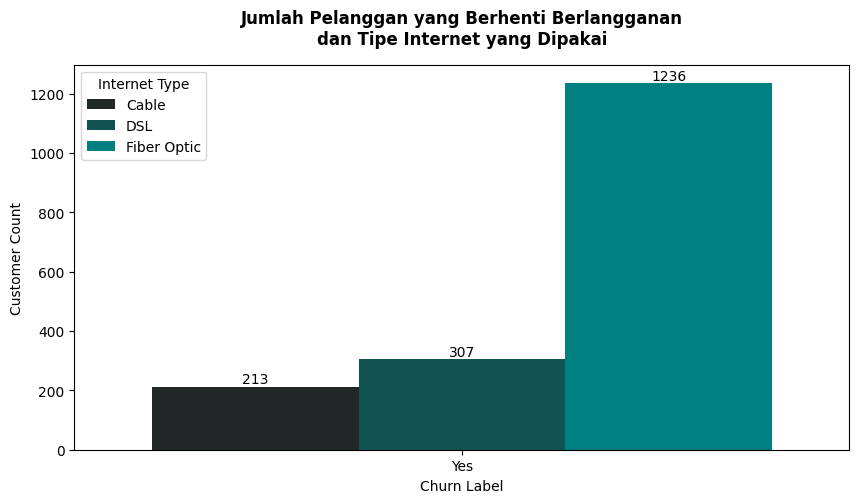

In [41]:
# @title **Fiber Optic Menjadi Penyumbang Churn Terbesar**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.loc[
        (services_status['Internet Service'] == 'Yes') &
        (services_status['Churn Label'] == 'Yes')
    ].pivot_table(index=['Churn Label', 'Internet Type'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Internet Type',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berhenti Berlangganan\ndan Tipe Internet yang Dipakai', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan yang Berhenti Berlangganan dan Tipe Internet Yang Dipakai***

- Dominasi Fiber Optic: Dari pelanggan internet yang pergi (churn), mayoritas adalah pengguna Fiber Optic sebanyak 1.236 pelanggan.

- Perbandingan Jauh: Angka ini jauh melampaui pengguna DSL (307 churn) dan Cable (213 churn).

**Key Insight:** Ada masalah serius pada layanan Fiber Optic. Entah itu kualitas jaringan yang tidak stabil, harga yang terlalu mahal dibanding nilai yang didapat (overpriced), atau persaingan yang sangat ketat di segmen ini.

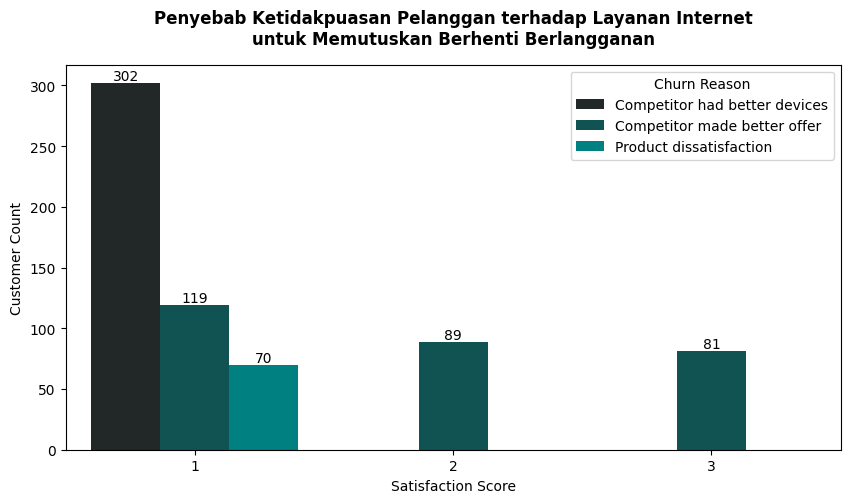

In [42]:
# @title **Mengapa Mereka Pergi? (Hardware & Harga)**
plt.figure(figsize=(10,5))
sns.barplot(data=services_status.loc[
                  (services_status['Internet Service'] == 'Yes') &
                  (services_status['Churn Label'] == 'Yes')
              ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').fillna(0).astype('int').sort_values(by='Customer ID', ascending=False)[0:5],
            x='Satisfaction Score',
            y='Customer ID',
            hue='Churn Reason',
            palette='dark:teal',
            saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Pelanggan terhadap Layanan Internet\nuntuk Memutuskan Berhenti Berlangganan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan Pelanggan Terhadap Layanan Internet***

- Masalah Perangkat (Hardware): Pada pelanggan yang sangat kecewa (Score 1), alasan nomor satu adalah "Competitor had better devices" (302 orang). Ini mengindikasikan bahwa modem/router yang disediakan perusahaan mungkin ketinggalan zaman atau performanya buruk dibandingkan milik kompetitor.

- Perang Harga/Penawaran: Alasan "Competitor made better offer" muncul konsisten di semua tingkat ketidakpuasan (Score 1, 2, dan 3). Kompetitor sangat agresif menyerang segmen ini dengan harga atau promo yang lebih menarik.

### Layanan Tambahan Keamanan Online

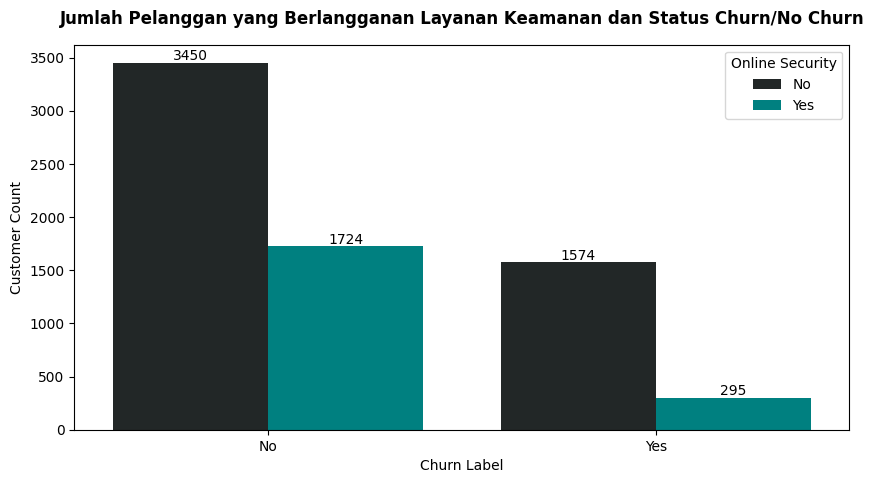

In [43]:
# @title **Layanan Tambahan Online Security Menurunkan Resiko Churn**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Online Security'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Online Security',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Keamanan dan Status Churn/No Churn', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insght: Jumlah Pelanggan yang Berlangganan Layanan Keamanan***

Online Security Menurunkan Risiko Churn Secara Drastis:
- Pelanggan TANPA Online Security: Rasio Churn tinggi (1.574 pergi vs 3.450 bertahan). Tingkat Churn $\approx 31\%$.

- Pelanggan DENGAN Online Security: Rasio Churn rendah (295 pergi vs 1.724 bertahan). Tingkat Churn $\approx 14\%$.

Key Insight: Menjual fitur Online Security kepada pelanggan terbukti memangkas risiko mereka untuk pindah hingga setengahnya. Produk ini membuat pelanggan "terikat".

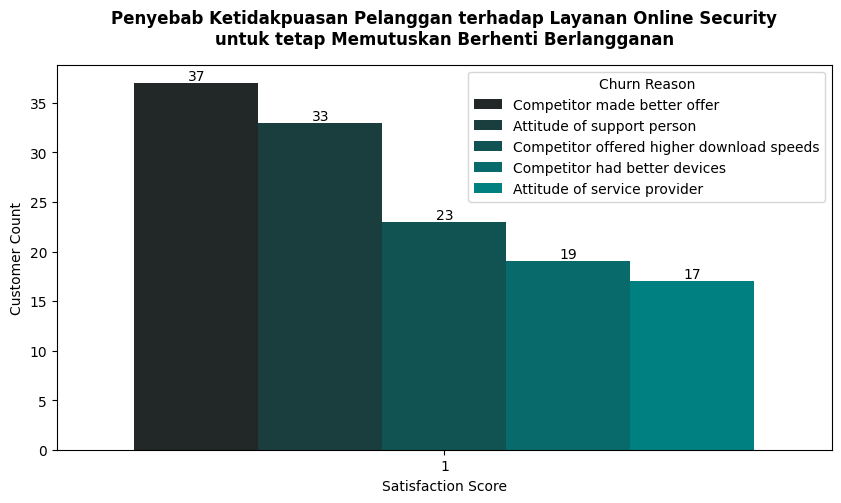

In [44]:
# @title **Mengapa Pelanggan Online Security Tetap Pergi?**
plt.figure(figsize=(10,5))
sns.barplot(data=services_status.loc[
                (services_status['Online Security'] == 'Yes') &
                (services_status['Churn Label'] == 'Yes')
              ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[0:5],
            x='Satisfaction Score',
            y='Customer ID',
            hue='Churn Reason',
            palette='dark:teal',
            saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Pelanggan terhadap Layanan Online Security\nuntuk tetap Memutuskan Berhenti Berlangganan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan terhadap Layanan Online Security***

- Kompetitor Menyerang Harga & Performa (37 + 23 votes): Alasan utama adalah "Competitor made better offer" dan "Higher download speeds".
  - Artinya: Meskipun pelanggan sudah "terikat" dengan fitur keamanan, mereka tetap rasional. Jika Internet lemot atau ada yang lebih murah, mereka tetap pergi.

- Faktor Manusia: Bad Support Experience (33 votes): Alasan kedua tertinggi adalah "Attitude of support person".

  - Insight Kritis: Pelanggan yang membeli fitur tambahan (seperti Security) biasanya lebih sering berinteraksi dengan Tech Support untuk setup/troubleshoot. Jika staf support kasar atau tidak membantu, pelanggan premium ini akan langsung kecewa berat (Skor 1) dan pergi.

**Kesimpulan:** Berbeda dengan Layanan Layanan Sebelum nya, Pelanggan yang memilih untuk Berhenti Berlangganan pada Layanan Keamanan ini walaupun jumlah pelanggan nya sedikit, tetapi dapat dipastikan penyebab pelanggan yang memakai layanan keamanan tambahan ini berhenti berlangganan karena sangat tidak puas pada produk dengan alasan penawaran yang ditawarkan tidak menarik dan kompetitor memiliki penawaran yang lebih menarik, selain itu ternyara layanan tambahan seperti teknisi bantuan memiliki attitude yang tidak baik.

### Layanan Tambahan Backup

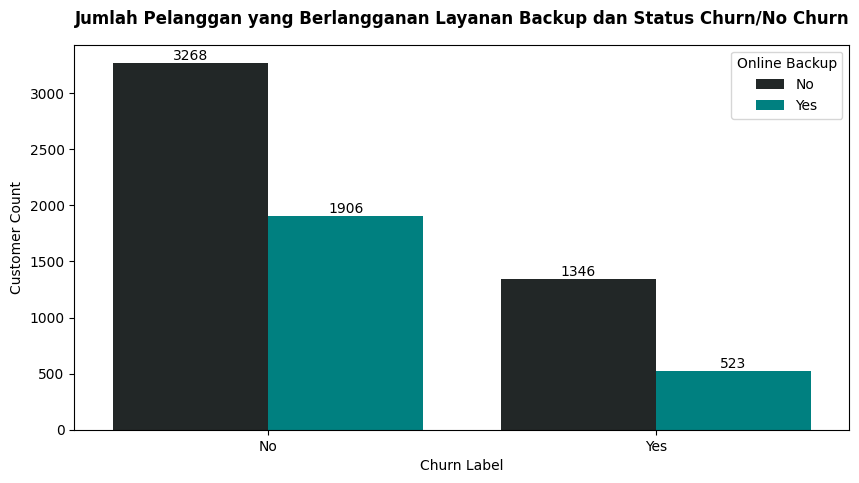

In [45]:
# @title **Layanan Tambahan Online Backup "Mengerem" Churn, tetapi Tidak Menghentikannya**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Online Backup'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Online Backup',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Backup dan Status Churn/No Churn', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan yang Berlangganan Layanan Backup Online***

- Tanpa Backup: Tingkat Churn cukup tinggi. Dari total pelanggan tanpa backup, sekitar 29% memutuskan untuk pergi ($1346 \div (3268+1346)$).
- Dengan Backup: Tingkat Churn menurun menjadi sekitar 21% ($523 \div (1906+523)$).

**Kesimpulan:** Fitur Online Backup memang membantu meningkatkan loyalitas (menurunkan churn rate sekitar 8%), namun efeknya tidak sekuat fitur keamanan (Online Security). Masih ada 523 pelanggan yang "bocor" meskipun sudah berlangganan Layanan Tambahan ini.

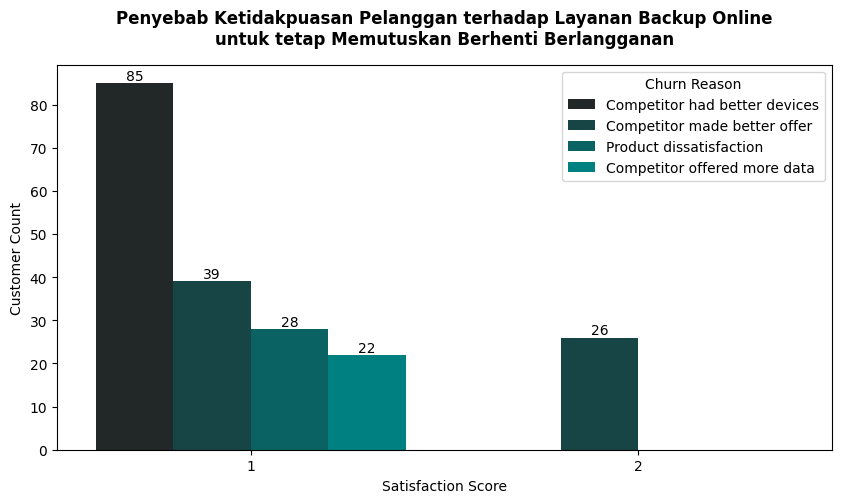

In [46]:
# @title **Penyebab Pelanggan Backup Online Churn**
plt.figure(figsize=(10,5))
sns.barplot(data=services_status.loc[
                  (services_status['Online Backup'] == 'Yes') &
                  (services_status['Churn Label'] == 'Yes')
              ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[0:5],
            x='Satisfaction Score',
            y='Customer ID',
            hue='Churn Reason',
            palette='dark:teal',
            saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Pelanggan terhadap Layanan Backup Online\nuntuk tetap Memutuskan Berhenti Berlangganan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan Pelanggan terhadap Layanan Backup Online***

- Masalahnya Bukan di Software, tapi Hardware: Penyebab nomor 1 yang paling dominan (dengan total 111 suara gabungan Score 1 & 2) adalah "Competitor had better devices".

  - Pelanggan berlangganan layanan digital (cloud backup), tetapi mereka pindah karena menginginkan modem, router, atau perangkat fisik yang lebih canggih dari kompetitor. Ini menandakan, Layanan Internet adalah Sumber Masalahnya didukung dari visualisasi data ini.

- Penawaran Kompetitor (Better Offer): Alasan kedua (39 suara) adalah harga/penawaran. Ini wajar, namun kalah jumlah dibandingkan alasan perangkat.

- Ketidakpuasan Produk (Product Dissatisfaction): Hanya ada di urutan ketiga (28 suara). Artinya, fitur Backup itu sendiri sebenarnya mungkin berfungsi baik, tapi tidak cukup untuk menahan pelanggan yang kecewa dengan kualitas perangkat kerasnya.

**Kesimpulan:** Ini menandakan bahwa "perangkat yang buruk/kuno" bukan hanya gangguan kecil, melainkan sumber frustrasi utama yang membuat mereka memberikan nilai terendah sebelum akhirnya pindah.


### Layanan Tambahan Paket Perlindungan Perangkat

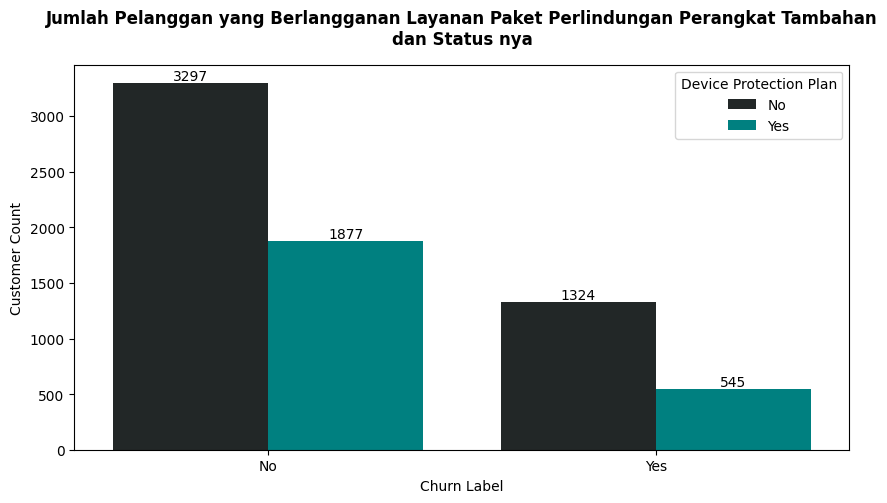

In [47]:
# @title **"Ironi" Device Protection**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Device Protection Plan'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Device Protection Plan',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Paket Perlindungan Perangkat Tambahan\ndan Status nya', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Jumlah Pelanggan Yang Berlangganan Layanan Paket Perlindungan Perangkat Tambahan***

Efektivitas Rendah:
Berbeda dengan Tech Support yang memangkas churn hingga separuhnya, Device Protection hanya menurunkan churn sedikit (dari $28\%$ ke $22\%$). Ini menandakan fitur ini kurang efektif mengunci pelanggan.



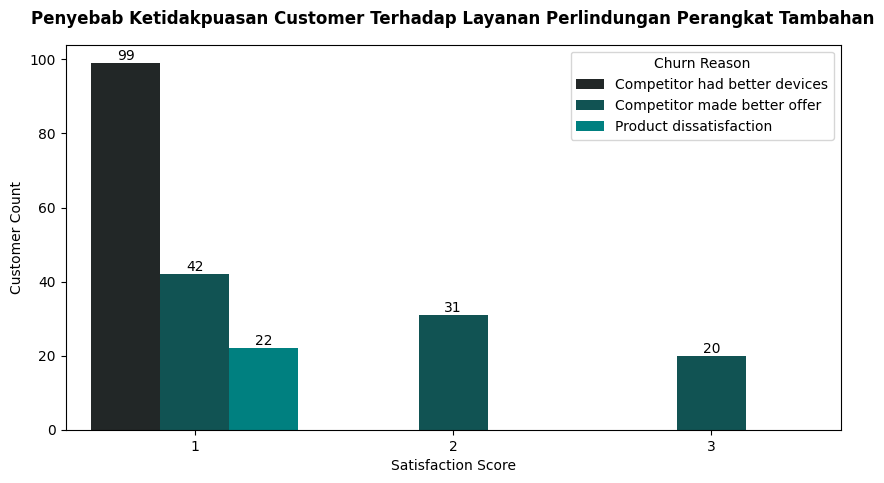

In [48]:
# Filter Customer Churn yang menggunakan Layanan Paket Perlindungan Perangkat Tambahan beserta Skor Kepuasan dan Alasan nya
plt.figure(figsize=(10,5))
sns.barplot(data=services_status.loc[
                  (services_status['Device Protection Plan'] == 'Yes') &
                  (services_status['Churn Label'] == 'Yes')
              ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[0:5],
            x='Satisfaction Score',
            y='Customer ID',
            hue='Churn Reason',
            palette='dark:teal',
            saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Customer Terhadap Layanan Perlindungan Perangkat Tambahan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan Pelanggan Terhadap Layanan Perlindungan Perangkat Tmabahan***

- Alasan Churn yang "Menampar": Lihat alasan nomor 1 kenapa pengguna Device Protection pergi adalah "Competitor had better devices" dengan jumlah yang sangat masif (99 orang di Score 1).

- Analisis Situasi: Ini adalah ironi bisnis. Pelanggan membayar biaya tambahan bulanan untuk melindungi perangkat (modem/router/hp) yang mereka sewa, TAPI mereka pergi karena merasa perangkat tersebut jelek/kalah canggih dibanding kompetitor.

Ibaratnya: Mereka membayar asuransi untuk mobil tua yang mogok, akhirnya mereka mending ganti mobil saja.

### Layanan Tambahan Paket Dukungan Teknis

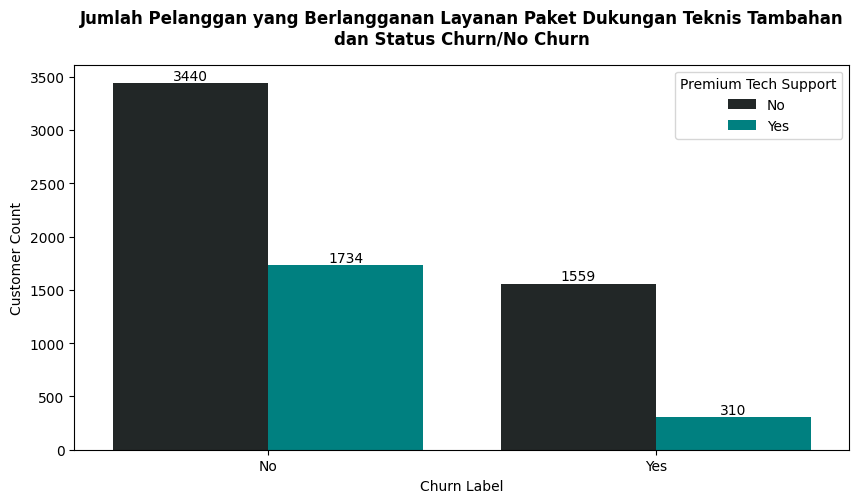

In [49]:
# @title **Tech Support Bisa Dijadikan Alat Penahan Pelanggan**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.pivot_table(index=['Churn Label', 'Premium Tech Support'], values='Customer ID', aggfunc='count'),
    x='Churn Label',
    y='Customer ID',
    hue='Premium Tech Support',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Jumlah Pelanggan yang Berlangganan Layanan Paket Dukungan Teknis Tambahan\ndan Status Churn/No Churn', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

**Insight: Jumlah Pelanggan Layanan Paket Dukungan Teknis Tambahan****

- Tanpa Tech Support: Tingkat Churn tinggi ($\approx 31\%$).
- Dengan Tech Support: Tingkat Churn turun drastis menjadi ($\approx 15\%$).

**Maknanya:** Pelanggan yang sering dibantu oleh teknisi merasa lebih "diperhatikan" dan malas berpindah karena harus memulai konfigurasi teknis dari nol lagi di provider baru. Ini adalah fitur yang membangun hubungan (relationship builder).

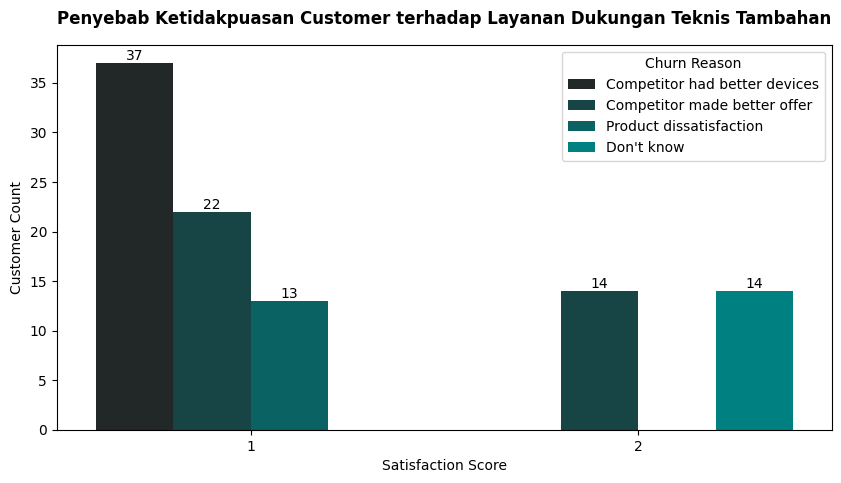

In [50]:
# Filter Customer Churn yang menggunakan Layanan Paket Dukungan Teknis Tambahan beserta Skor Kepuasan dan Alasan nya
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_status.loc[
                (services_status['Premium Tech Support'] == 'Yes') &
                (services_status['Churn Label'] == 'Yes')
              ].pivot_table(index=['Satisfaction Score', 'Churn Reason'], values='Customer ID', aggfunc='count').sort_values(by='Customer ID', ascending=False)[0:5],
            x='Satisfaction Score',
            y='Customer ID',
            hue='Churn Reason',
            palette='dark:teal',
            saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Penyebab Ketidakpuasan Customer terhadap Layanan Dukungan Teknis Tambahan', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Penyebab Ketidakpuasan Pelanggan terhadap Layanan Dukungan Teknis Tambahan***

- Alasan Utama nya masih "Competitor had Better Devices". Pertanda perusahaan harus segera meningkatkan kualitas produknya dengan peningkatan perangkat yang dipakai

- Di kedua layanan ini (Tech Support & Device Protection), alasan kedua terkuat selalu "Competitor made better offer".
Ini konsisten. Pelanggan yang mengambil banyak add-ons (Support + Protection) tagihannya pasti membengkak. Mereka menjadi target empuk bagi kompetitor yang menawarkan paket bundling dengan harga lebih miring.

Dari Keseluruhan data yang yang sudah visualisasikan, alasan utama Pelanggan Memilih Berhenti Berlangganan adalah:
1. Perangkat yang digunakan kualitas nya Buruk
2. Penawaran promo nya tidak Menarik
3. Teknisi Bantuan Attitude nya Buruk
4. Ketidakpuasan Terhadap Produk

## **Apa Faktor lain yang Mendorong Customer Memutuskan Berpindah?**

In [51]:
services_demo_status.describe()[['Monthly Charge','Total Charges', 'Total Revenue']]

,Monthly Charge,Total Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2280.381264,3034.379056
std,30.090047,2266.220462,2865.204542
min,18.250000,18.800000,21.360000
25%,35.500000,400.150000,605.610000
50%,70.350000,1394.550000,2108.640000
75%,89.850000,3786.600000,4801.145000
max,118.750000,8684.800000,11979.340000


In [52]:
services_demo_status.pivot_table(index='Churn Label', values=['Monthly Charge','Total Charges', 'Total Revenue'], aggfunc='mean')

,Monthly Charge,Total Charges,Total Revenue
Churn Label,,,
No,61.265124,2550.792103,3418.374927
Yes,74.441332,1531.796094,1971.353569


/tmp/ipython-input-434687425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=services_demo_status, x='Churn Label', y='Monthly Charge', palette={'No': '#2ecc71', 'Yes': '#e74c3c'})


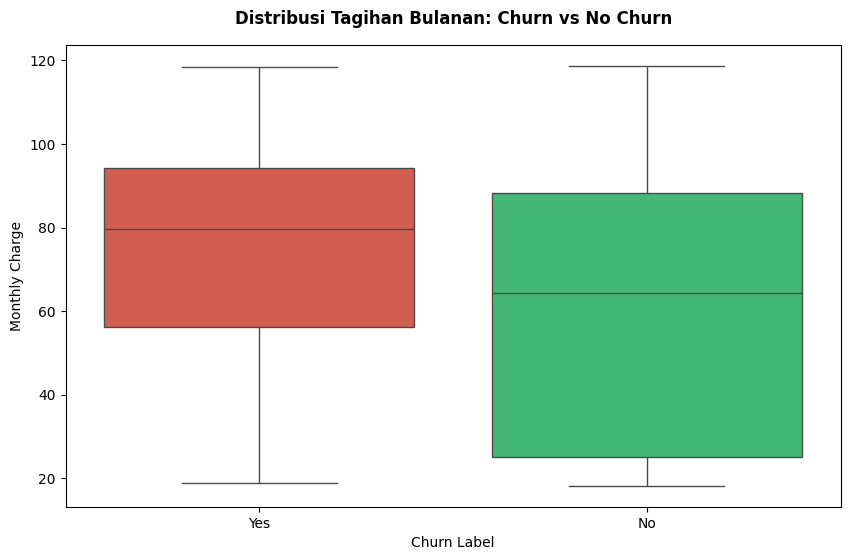

In [53]:
# @title **Pelanggan Churn Membayar Tagihan Lebih Mahal**
plt.figure(figsize=(10, 6))
sns.boxplot(data=services_demo_status, x='Churn Label', y='Monthly Charge', palette={'No': '#2ecc71', 'Yes': '#e74c3c'})
plt.title('Distribusi Tagihan Bulanan: Churn vs No Churn', pad=15, fontweight='bold')
plt.show()

***Insight: Distribusi Tagihan Bulanan: Churn Vs No Churn***

- Median yang Jomplang: Garis tengah (median) pada box warna Merah (Yes Churn) berada di kisaran \$80, sedangkan box Hijau (No Churn) ada di kisaran \$65.

- Churner = High Spender: Perhatikan bentuk box merah. Kotaknya "gemuk" di bagian atas. Hampir tidak ada pelanggan dengan tagihan rendah (di bawah \$30) yang Churn. Sebaliknya, mayoritas yang Churn adalah mereka yang tagihannya di atas \$70.

- Loyalitas di Segmen Murah: Box hijau memiliki rentang yang sangat luas sampai ke bawah. Artinya, pelanggan dengan tagihan murah sangat setia dan jarang sekali berpindah.

**Kesimpulan:** Rata Rata Tagihan Bulanan Pelanggan yang Berhenti Berlangganan Lebih Tinggi daripada yang Masih Berlangganan, ini membuktikan bahwa Pelanggan sudah merasa tidak "Worth it" untuk Lanjut Berlangganan karena sudah merasa uang banyak yang dikeluarkan tidak setara dengan kualitas produk yang dia beli

### Tagihan Bulanan Berdasarkan Layanan

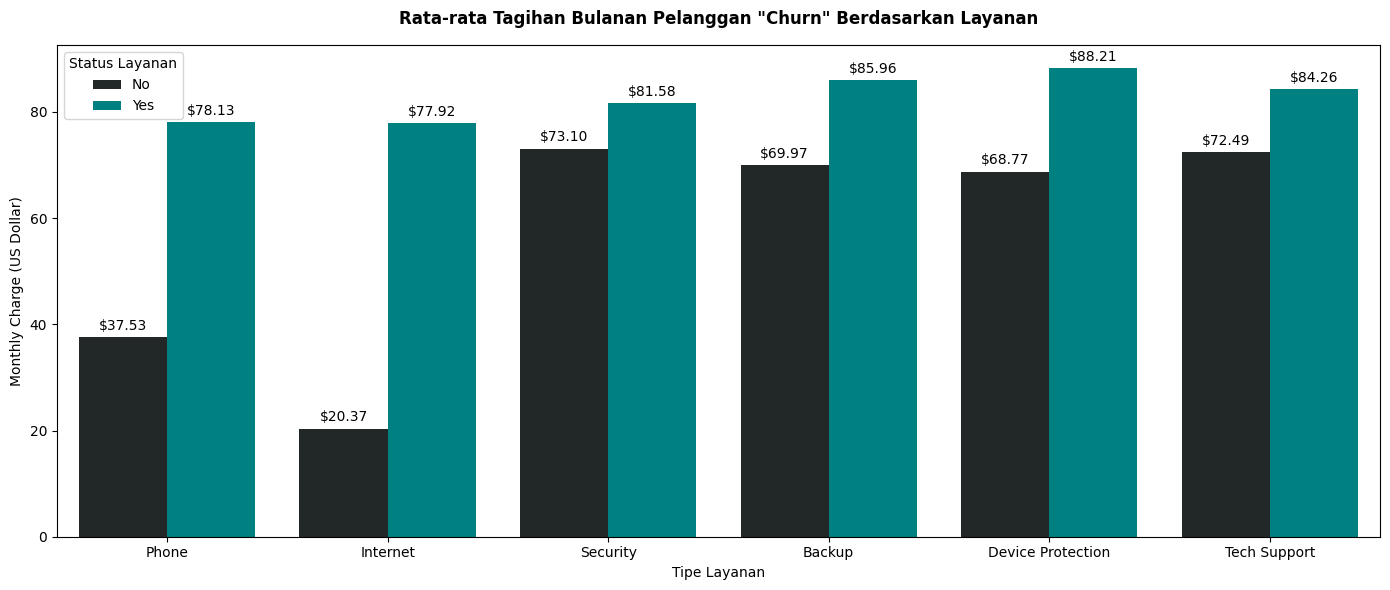

In [54]:
# @title **Rata-Rata Tagihan Bulanan Pelanggan Churn**
churn_data = services_demo_status[services_demo_status['Churn Label'] == 'Yes']
no_churn_data = services_demo_status[services_demo_status['Churn Label'] == 'No']

service_map = {
    'Phone Service': 'Phone',
    'Internet Service': 'Internet',
    'Online Security': 'Security',
    'Online Backup': 'Backup',
    'Device Protection Plan': 'Device Protection',
    'Premium Tech Support': 'Tech Support'
}

dfs_churn = []
dfs_no_churn = []
for col, label in service_map.items():
    temp_dfs = churn_data.groupby(col)['Monthly Charge'].mean().reset_index()
    temp_dfs.columns = ['Service', 'Monthly Charge']
    temp_dfs['Service Type'] = label

    temp_dfs2 = no_churn_data.groupby(col)['Monthly Charge'].mean().reset_index()
    temp_dfs2.columns = ['Service', 'Monthly Charge']
    temp_dfs2['Service Type'] = label

    dfs_churn.append(temp_dfs)
    dfs_no_churn.append(temp_dfs2)

monthly_charges_by_service = pd.concat(dfs_churn, ignore_index=True)
monthly_charges_by_service_nochurn = pd.concat(dfs_no_churn, ignore_index=True)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=monthly_charges_by_service,
    x='Service Type',
    y='Monthly Charge',
    hue='Service',
    palette='dark:teal',
    saturation=1
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}', padding=3)

plt.title('Rata-rata Tagihan Bulanan Pelanggan "Churn" Berdasarkan Layanan', pad=15, fontweight='bold')
plt.ylabel('Monthly Charge (US Dollar)')
plt.xlabel('Tipe Layanan')
plt.legend(title='Status Layanan')
plt.tight_layout()
plt.show()

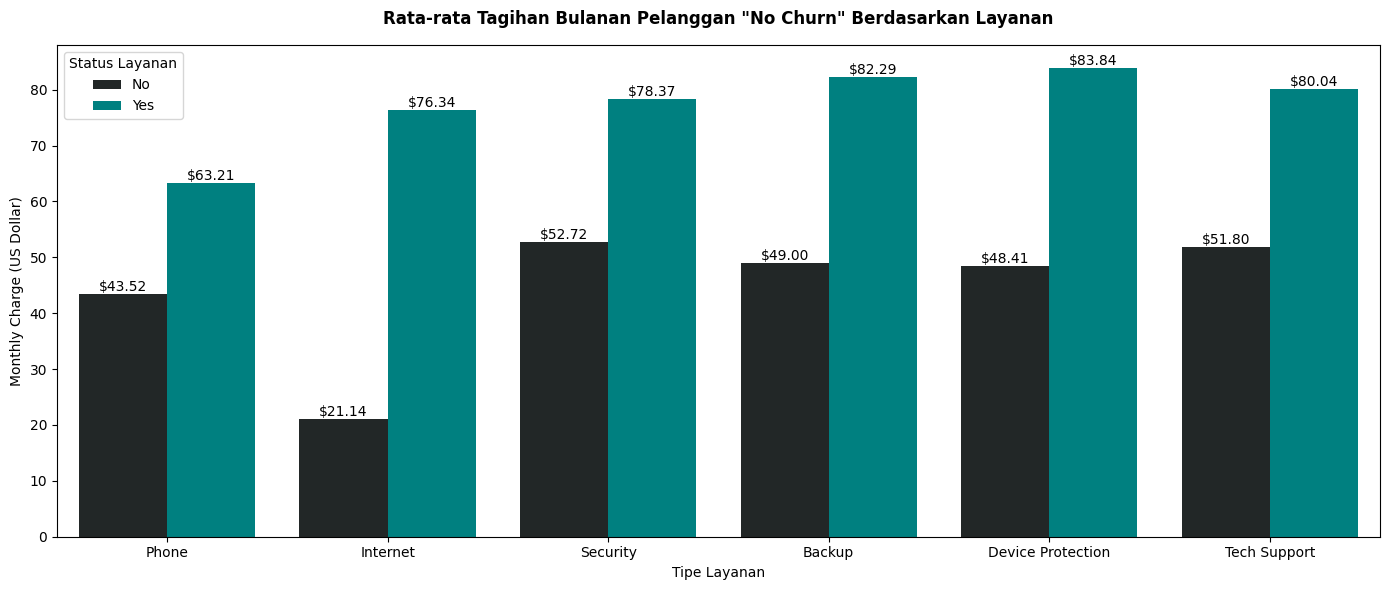

In [55]:
# @title **Rata Rata Tagihan Bulanan Pelanggan Setia**
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_charges_by_service_nochurn,
    x='Service Type',
    y='Monthly Charge',
    hue='Service',
    palette='dark:teal',
    saturation=1
)

plt.bar_label(plt.gca().containers[0], fmt='${:,.2f}')
plt.bar_label(plt.gca().containers[1], fmt='${:,.2f}')

plt.title('Rata-rata Tagihan Bulanan Pelanggan "No Churn" Berdasarkan Layanan', pad=15, fontweight='bold')
plt.ylabel('Monthly Charge (US Dollar)')
plt.xlabel('Tipe Layanan')
plt.legend(title='Status Layanan')
plt.tight_layout()
plt.show()

***Insight: dari Visualisasi Rata Rata Tagihan Bulanan Pelanggan Churn dan No CHurn***

Saat menyandingkan grafik batang pelanggan yang Churn dengan pelanggan No Churn, terlihat perbedaan harga yang mencolok untuk layanan yang sama.

- Phone Service Gap:

  - Pelanggan No Churn dengan layanan telepon rata-rata membayar $63.21.

  - Pelanggan Churn dengan layanan telepon rata-rata membayar $78.13.

Insight: Ada selisih sekitar $15, Ini mengindikasikan bahwa pelanggan yang pergi merasa "kemahalan" untuk layanan dasar yang sama. Kemungkinan pelanggan setia (No Churn) menikmati harga kontrak lama yang murah atau diskon promo, sementara yang Churn terkena harga normal yang tinggi.

- Internet Service Anomaly:

  - Untuk Internet, harganya hampir sama (\$76 vs \$77). Ini berarti untuk internet, masalahnya mungkin bukan cuma harga, tapi kualitasnya baik produk maupun perangkat.

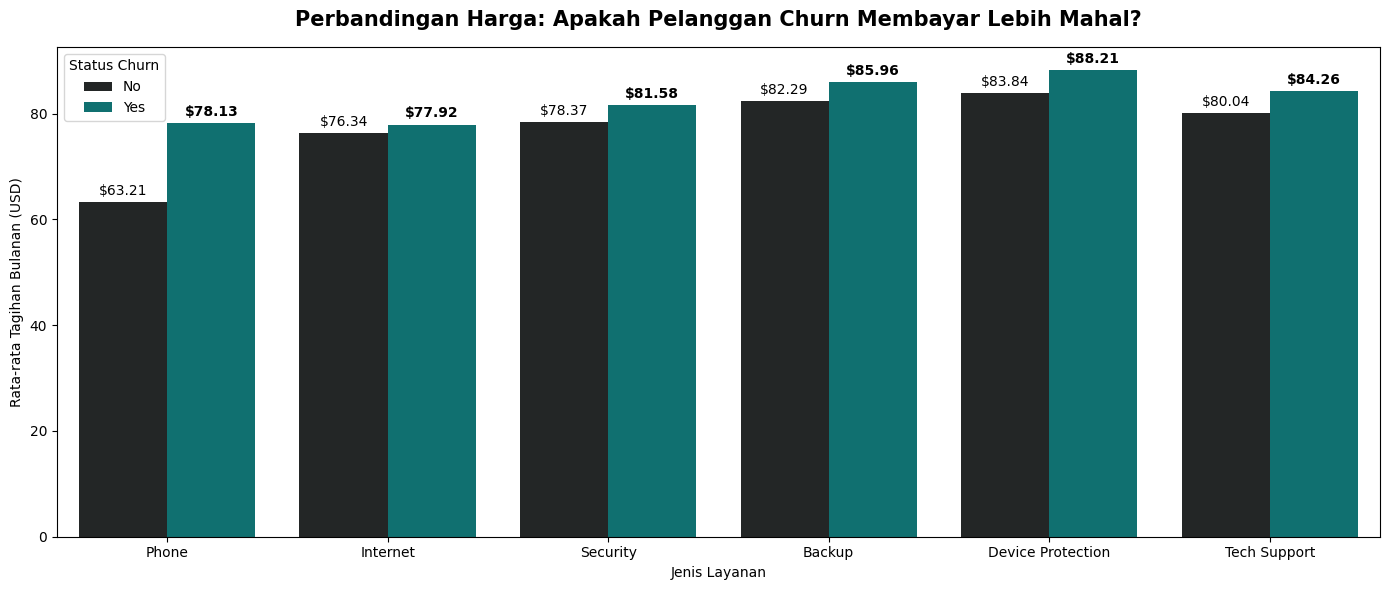

In [56]:
# @title **Benarkah Pelanggan Churn Membayar Lebih Mahal?**
service_map = {
    'Phone Service': 'Phone',
    'Internet Service': 'Internet',
    'Online Security': 'Security',
    'Online Backup': 'Backup',
    'Device Protection Plan': 'Device Protection',
    'Premium Tech Support': 'Tech Support'
}

dfs = []

for col, label in service_map.items():
    active_users = services_demo_status[services_demo_status[col] == 'Yes']

    temp_df = active_users.groupby('Churn Label')['Monthly Charge'].mean().reset_index()

    temp_df['Service Type'] = label
    dfs.append(temp_df)

comparison_df = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=comparison_df,
    x='Service Type',
    y='Monthly Charge',
    hue='Churn Label',
    palette='dark:teal'
)

for i, container in enumerate(plt.gca().containers):
    if i == 1:
      plt.bar_label(container, fmt='${:,.2f}', padding=3, fontsize=10, fontweight='bold')
    else:
      plt.bar_label(container, fmt='${:,.2f}', padding=3)

plt.title('Perbandingan Harga: Apakah Pelanggan Churn Membayar Lebih Mahal?', fontsize=15, pad=15, fontweight='bold')
plt.ylabel('Rata-rata Tagihan Bulanan (USD)')
plt.xlabel('Jenis Layanan')
plt.legend(title='Status Churn')
plt.tight_layout()
plt.show()

***Validasi: Apakah Pelanggan Churn Membayar Lebih Mahal***

**Jawabannya: YA, Pelanggan yang Churn membayar lebih mahal untuk layanan yang sama.**

1. "Phone Service" adalah Penyumbang Disparitas Harga Terbesar

    - Loyal Customer (No): Rata-rata bayar $63.21.

    - Churn Customer (Yes): Rata-rata bayar $78.13.

    - Gap: Hampir \$15 (atau sekitar \23% lebih mahal).

Analisis: Ini aneh. Layanan telepon biasanya standar. Jika ada selisih sebesar ini, kemungkinan besar pelanggan setia berada di paket lama yang murah, sedangkan pelanggan baru atau yang churn dipaksa masuk ke paket baru yang mahal atau memiliki fitur Multiple Lines yang sebenarnya tidak mereka butuhkan.

2. Anomali Internet: Harga Sama, Tapi Tetap Pergi?

   - Gap harganya sangat tipis (\$76.34 vs \$77.92). Hampir tidak ada bedanya.

Analisis: Jika harganya sama tapi mereka tetap pergi, berarti masalah utamanya BUKAN Harga, melainkan Kualitas (Performance).

Ini memvalidasi temuan ku sebelumnya bahwa pengguna Fiber Optic banyak yang kabur. Mereka membayar harga premium (sama seperti pelanggan setia), tapi mungkin mengalami gangguan koneksi, sehingga Value for Money-nya hancur.

3. Jebakan "Add-ons" (Security, Backup, Support)

    - Semua batang (baik Churn maupun No Churn) berada di kisaran angka tinggi (\$80 - \$88).

    - Pelanggan yang mengambil layanan tambahan ini otomatis menjadi High Value Customer.

Namun, lihat batang berwarna Teal "Yes" selalu lebih tinggi. Ini menunjukkan bahwa semakin lengkap paket yang diambil, semakin sensitif pelanggan terhadap kenaikan harga sekecil apapun. Selisih \$3-\$5 saja pada total tagihan yang sudah besar (\$80+) bisa menjadi pemicu untuk pindah ke kompetitor.

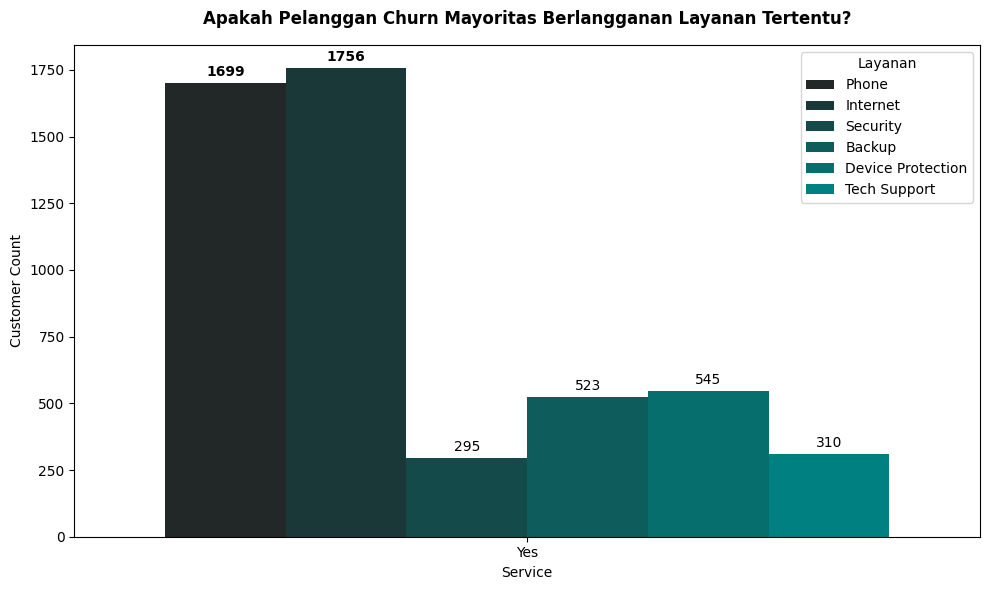

In [57]:
# @title **Masalah ada di Core Product**
churn_data = services_demo_status[services_demo_status['Churn Label'] == 'Yes']
no_churn_data = services_demo_status[services_demo_status['Churn Label'] == 'No']

service_map = {
    'Phone Service': 'Phone',
    'Internet Service': 'Internet',
    'Online Security': 'Security',
    'Online Backup': 'Backup',
    'Device Protection Plan': 'Device Protection',
    'Premium Tech Support': 'Tech Support'
}

dfs = []
for col, label in service_map.items():
    temp_dfs = churn_data[churn_data[col]=='Yes'].groupby(col)['Customer ID'].count().reset_index()
    temp_dfs.columns = ['Service', 'Customer ID']
    temp_dfs['Service Type'] = label

    dfs.append(temp_dfs)

device_protection = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=device_protection,
    x='Service',
    y='Customer ID',
    hue='Service Type',
    palette='dark:teal',
    saturation=1
)

for i, container in enumerate(plt.gca().containers):
    if i < 2:
      plt.bar_label(container, padding=3, fontsize=10, fontweight='bold')
    else:
      plt.bar_label(container, padding=3)

plt.title('Apakah Pelanggan Churn Mayoritas Berlangganan Layanan Tertentu?', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Service')
plt.legend(title='Layanan')
plt.tight_layout()
plt.show()

***Insight: Apakah Pelanggan Churn Mayoritas Berlangganan Layanan Tertentu?***

- Dominasi Internet & Phone: Sebanyak 1.756 pelanggan yang Churn adalah pengguna Internet, dan 1.699 adalah pengguna Telepon.

**Analisis:** Churn bukan disebabkan oleh fitur tambahan yang "aneh-aneh". Masalahnya ada di Layanan Utama (Core Service). Jika layanan inti (Internet/Phone) ini mengecewakan atau terlalu mahal, pelanggan akan pergi, tidak peduli seberapa bagus fitur tambahannya.

/tmp/ipython-input-284175915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


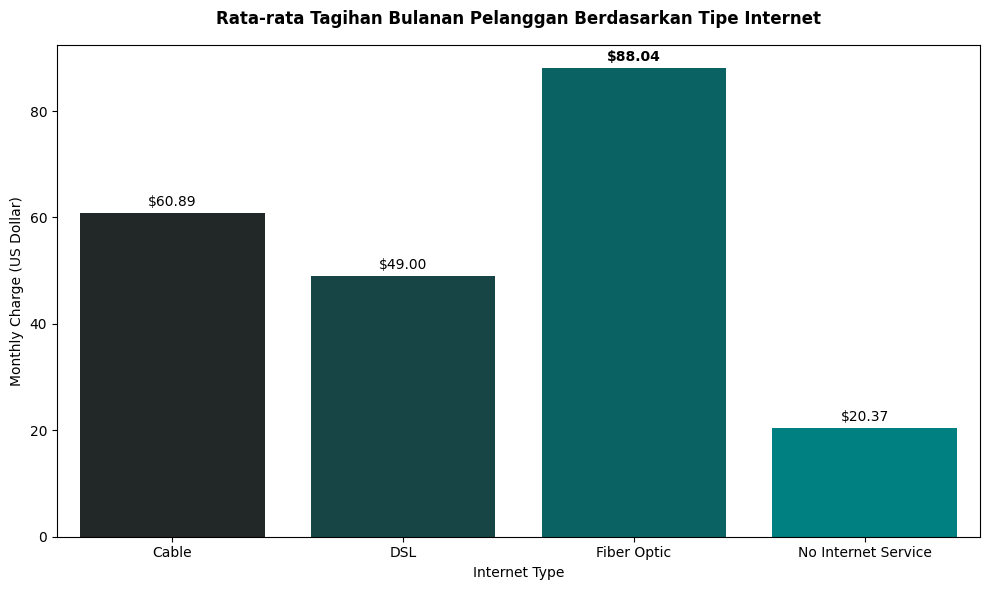

In [58]:
# @title **Tersangka Utama (Fiber Optic)**
plt.figure(figsize=(10, 6))
sns.barplot(
    data=churn_data.groupby('Internet Type')['Monthly Charge'].mean().reset_index(),
    x='Internet Type',
    y='Monthly Charge',
    palette='dark:teal',
    saturation=1
)

for i, container in enumerate(plt.gca().containers):
    if i == 2:
      plt.bar_label(container, fmt='${:,.2f}', padding=3, fontsize=10, fontweight='bold')
    else:
      plt.bar_label(container, fmt='${:,.2f}', padding=3)


plt.title('Rata-rata Tagihan Bulanan Pelanggan Berdasarkan Tipe Internet', pad=15, fontweight='bold')
plt.ylabel('Monthly Charge (US Dollar)')
plt.xlabel('Internet Type')
plt.tight_layout()
plt.show()

***Insight: Rata Rata Tagihan Bulanan Pelanggan dari Tipe Internet Yang ia Pakai***

- DSL (\$49) & Cable (\$60): Harganya masih masuk akal (di bawah "Zona Bahaya" \$75-\$80 yang kita temukan sebelumnya).

- Fiber Optic (\$88.04): Ini dia biang keroknya!

  - Harga rata-rata Fiber Optic (\$88) menembus batas psikologis pelanggan.

  - Ingat temuan Boxplot sebelumnya? Rata-rata tagihan Churner ada di \$78-\$80.

Kesimpulan: Hampir bisa dipastikan, Mayoritas Churner adalah pengguna Fiber Optic. Mereka membayar paling mahal, dan jika kecepatannya tidak stabil (masalah performa), mereka adalah segmen yang paling cepat marah dan pindah.

Faktor yang mendorong Pelanggan memilih Berhenti Berlangganan yaitu Tagihan Bulanan yang besar, sehingga pelanggan merasa tidak sesuai dengan kualitas porduk yang ia beli dengan harga itu. Selain itu, Pelanggan yang paling banyak memilih untuk berlangganan ada pada Pelanggan yang Berlangganan Layanan Telepon.

### Status Pelanggan Berdasarkan Kontrak

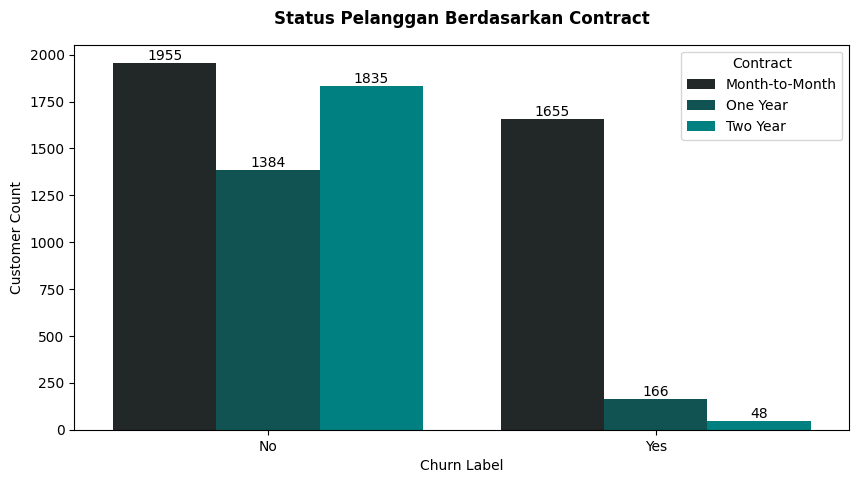

In [59]:
# @title **Kontrak Bulanan Harus Di Perhatikan**
plt.figure(figsize=(10,5))
sns.barplot(
    data=services_demo_status.groupby(['Churn Label', 'Contract'])['Customer ID'].count().reset_index(),
    x='Churn Label',
    y='Customer ID',
    hue='Contract',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Status Pelanggan Berdasarkan Contract', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.show()

***Insight: Kontrak Churn Vs No Churn***

- Dominasi Mutlak Month-to-Month: Dari total pelanggan yang Churn, mayoritas absolut (1.655 orang) berasal dari kontrak Month-to-Month.

- Kekebalan Kontrak Jangka Panjang: Bandingkan dengan mereka yang mengambil kontrak:

  - One Year: Hanya 166 yang churn.

  - Two Year: Hanya 48 yang churn.

**Kesimpulan:** Pelanggan kontrak bulanan (Month-to-Month) memiliki fleksibilitas untuk pergi kapan saja ("Easy in, Easy out"). Ditambah dengan temuan sebelumnya bahwa mereka membayar mahal (biasanya kontrak bulanan tidak dapat diskon), ini menjadi kombinasi fatal. Sebaliknya, kontrak 2 tahun hampir menjamin loyalitas 100%.

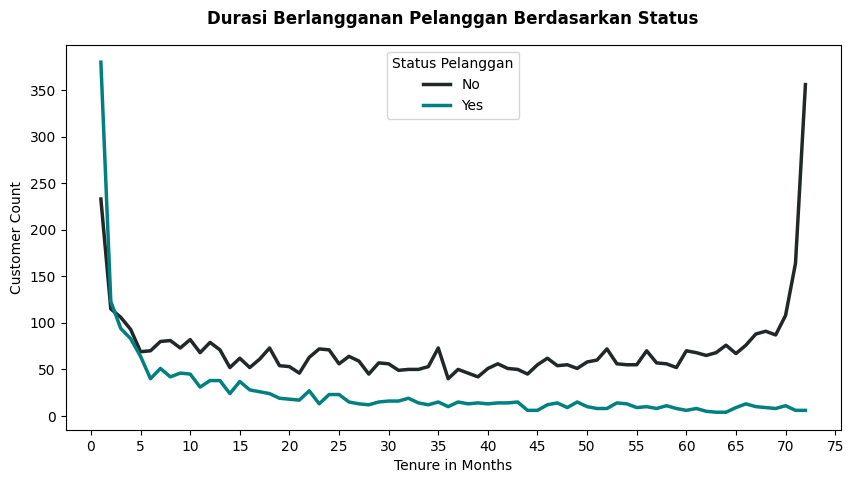

In [60]:
# @title **6 Bulan Pertama yang Harus di Waspadai**
plt.figure(figsize=(10,5))
sns.lineplot(
    data=services_demo_status.groupby(['Churn Label', 'Tenure in Months'])['Customer ID'].count().reset_index(),
    x='Tenure in Months',
    y='Customer ID',
    hue='Churn Label',
    palette='dark:teal',
    linewidth=2.5,
)

plt.title('Durasi Berlangganan Pelanggan Berdasarkan Status', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xticks(np.arange(0,80,5))
plt.legend(title='Status Pelanggan')
plt.show()

***Insight: Durasi Berlangganan Pelanggan Churn Vs No Churn***

- Fenomena "Early Churn" (Garis berwarna Teal Melambung di Awal): Terlihat lonjakan yang sangat ekstrem pada garis Teal (Yes Churn) di bulan ke-1 hingga bulan ke-5. Puncaknya ada di bulan pertama dengan hampir 380 pelanggan langsung berhenti.

- Pola "Survival": Setelah melewati bulan ke-10, garis Teal menjadi sangat landai/datar. Artinya, jika seorang pelanggan berhasil bertahan melewati tahun pertama, risiko mereka untuk churn menjadi sangat kecil.

**Kesimpulan:** Masalah retensi terbesar ada di proses Onboarding. Pelanggan baru mungkin merasa "tertipu" oleh kualitas yang tidak sesuai iklan, kaget dengan tagihan pertama, atau mengalami kesulitan teknis di awal pemasangan.

### Regional

In [61]:
cust_location = pd.merge(services_demo_status, df_location, on='Customer ID')
cust_location['City'].unique()

array(['Los Angeles', 'Inglewood', 'Whittier', ..., 'Topaz', 'Jacumba',
       'Holtville'], dtype=object)

/tmp/ipython-input-1909901371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


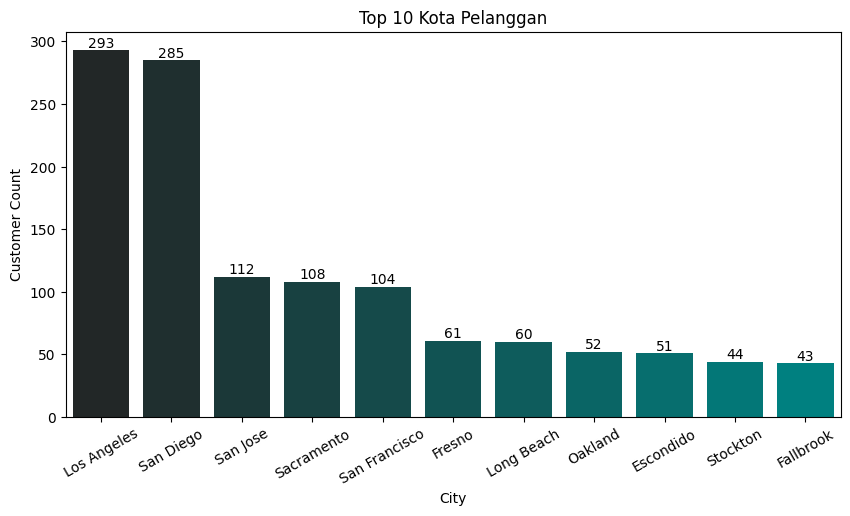

In [62]:
no_churn_city = cust_location.groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:11]

plt.figure(figsize=(10,5))
sns.barplot(
    data=no_churn_city,
    x='City',
    y='Customer ID',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Top 10 Kota Pelanggan')
plt.ylabel('Customer Count')
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-1139285257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


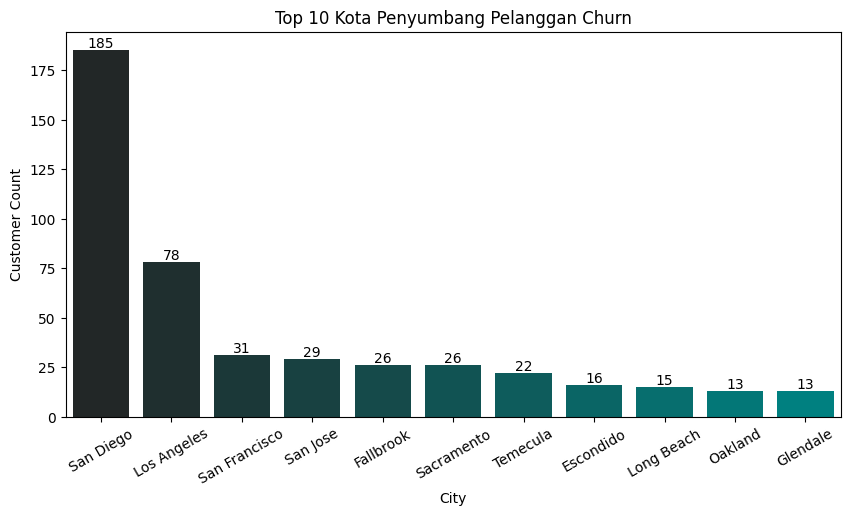

In [63]:
churn_city = cust_location[cust_location['Churn Label'] == 'Yes'].groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:11]
no_churn_city = cust_location[cust_location['Churn Label'] == 'No'].groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:11]

plt.figure(figsize=(10,5))
sns.barplot(
    data=churn_city,
    x='City',
    y='Customer ID',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Top 10 Kota Penyumbang Pelanggan Churn')
plt.ylabel('Customer Count')
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-1635348271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


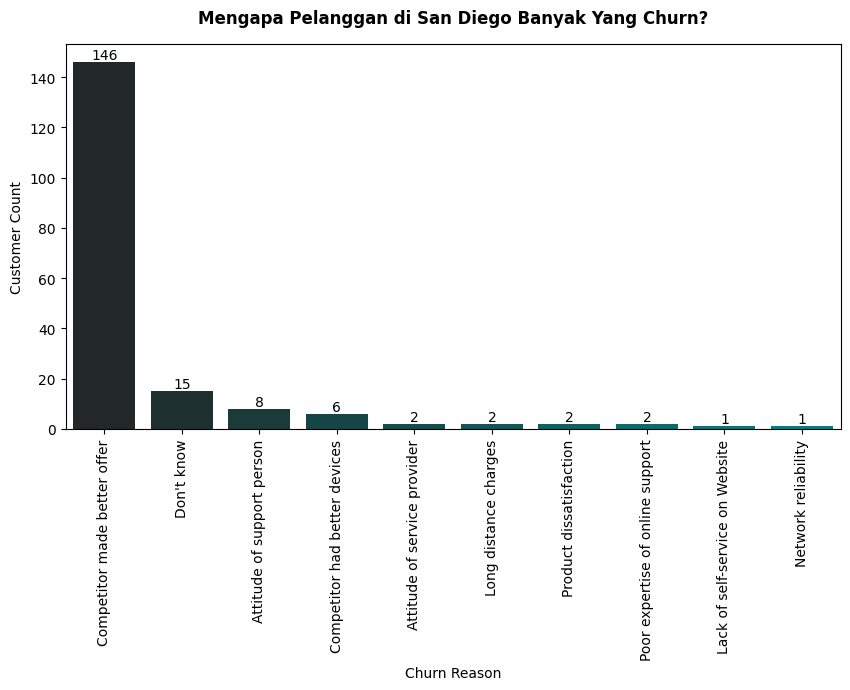

In [64]:
churn_reason_sandiego = cust_location[(cust_location['Churn Label'] == 'Yes') & (cust_location['City'] == 'San Diego')].groupby('Churn Reason')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:11]

plt.figure(figsize=(10,5))
sns.barplot(
    data=churn_reason_sandiego,
    x='Churn Reason',
    y='Customer ID',
    palette='dark:teal',
    saturation=1)

for container in plt.gca().containers:
    plt.bar_label(container)

plt.title('Mengapa Pelanggan di San Diego Banyak Yang Churn?', pad=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.show()

***Insight: Top 10 Kota Penyumbang Churn***

1. San Diego adalah Titik Pusat Masalah

    - Outlier Ekstrem: San Diego menyumbang 185 pelanggan churn (64% Pelanggan San Diego). Angka ini sangat jauh melampaui posisi kedua, Los Angeles, yang "hanya" menyumbang 78 pelanggan.

    - Disproporsional: Mengingat Los Angeles memiliki populasi yang jauh lebih besar daripada San Diego.

2. Kompetisi di Hub Teknologi
    - Koneksi dengan Temuan Sebelumnya, alasan churn utama adalah "Competitor made better offer" dan "Competitor had better devices"

    - Di wilayah padat seperti ini, persaingan ISP sangat ketat. Pelanggan punya banyak pilihan (bukan monopoli). Jika layanan Fiber Optic kita (yang harganya $88 tadi) sedikit saja bermasalah di San Diego, kompetitor lokal siap menampung mereka.
    
    - Nyatanya banyak Pelanggan yang sudah Berpindah ke Kompetitor di daerah San Diego karena Kompetitor memiliki penawaran produk yang lebih menarik.

### Penawaran

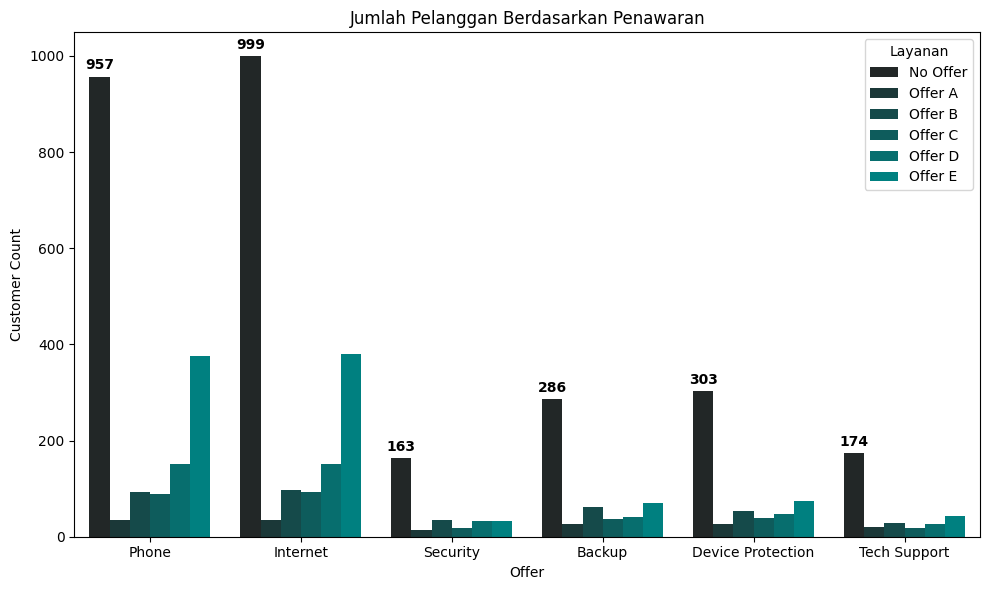

In [65]:
dfo = []
for col, label in service_map.items():
    temp_dfo = churn_data[churn_data[col]=='Yes'].groupby('Offer')['Customer ID'].count().reset_index()
    temp_dfo.columns = ['Offer', 'Customer ID']
    temp_dfo['Service Type'] = label

    dfo.append(temp_dfo)

offer_data = pd.concat(dfo, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=offer_data,
    x='Service Type',
    y='Customer ID',
    hue='Offer',
    palette='dark:teal',
    saturation=1
)

plt.bar_label(plt.gca().containers[0], padding=3, fontsize=10, fontweight='bold')

plt.title('Jumlah Pelanggan Berdasarkan Penawaran')
plt.ylabel('Customer Count')
plt.xlabel('Offer')
plt.legend(title='Layanan')
plt.tight_layout()
plt.show()

***Insight: Sisi Penawaran***

Ternyata, pelanggan tidak hanya pergi karena "Harga Mahal", tapi juga karena "Tidak Ada Usaha Mempertahankan Mereka" (No Offer).

1. Pelanggan yang Terlupakan: Bahaya Kategori No Offer

    Perhatikan batang hitam (No Offer) yang menjulang sangat tinggi di semua kategori layanan:

    - Dominasi Mutlak: Hampir 1.000 pelanggan Phone dan Internet yang Churn berada dalam status "No Offer".

Analisis: Ini adalah pelanggan yang membayar harga normal (tanpa promo). Mengingat analisis kita sebelumnya bahwa Churner membayar lebih mahal (~\$78-\$88), grafik ini mengonfirmasi bahwa mereka dibiarkan membayar harga penuh tanpa diberi insentif ("pemanis") untuk bertahan.

Kesimpulan: Tim retensi "kecolongan". Ribuan pelanggan ini pergi begitu saja tanpa sempat diselamatkan oleh penawaran khusus.

2. Misteri Kegagalan "Offer E"
Lihat batang berwarna teal terang (Offer E).

    Ini adalah satu-satunya penawaran yang memiliki tingkat Churn signifikan (sekitar 378 di Phone/Internet) dibandingkan Offer A, B, C, atau D.

    - Hipotesis: "Offer E" kemungkinan adalah penawaran paling rendah/murah (misal: diskon $5 atau trial jangka pendek).

Analisis: Penawaran ini gagal menahan pelanggan. Entah karena value-nya terlalu kecil untuk mengimbangi harga paket yang mahal, atau karena masa berlakunya habis terlalu cepat (menyebabkan tagihan melonjak lagi).

Pelajaran: Jangan gunakan strategi "Offer E" lagi untuk segmen berisiko tinggi, karena terbukti tidak efektif.

3. Offers A & B adalah "Juru Selamat"
Batang untuk Offer A dan Offer B sangat rendah (hampir tidak terlihat).

Analisis: Ini berarti pelanggan yang mendapatkan Offer A atau B sangat jarang yang Churn.

Implikasi: Offer A dan B kemungkinan adalah penawaran premium (misal: kontrak jangka panjang dengan diskon besar). Strategi ini terbukti ampuh mengunci loyalitas.

# ***EXECUTIVE SUMMARY: MENJAWAB TUJUAN PROYEK***

## **ANALISIS PERFORMA BISNIS & DAMPAK FINANSIAL (CHURN)**

Analisis ini membedah situasi "Apa yang terjadi" (Kondisi Churn) dan "Apa dampaknya" (Kerugian Finansial) berdasarkan data visualisasi yang tersedia.

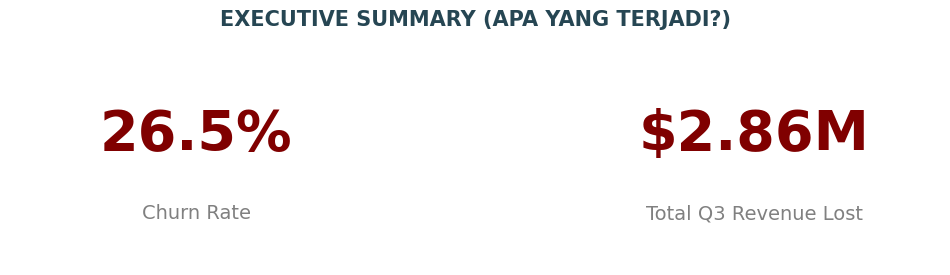

In [66]:
# @title **Apa Yang Terjadi?**

# Hitung Metrik
churn_rate = (df_status[df_status['Churn Label'] == 'Yes'].shape[0] / df_status.shape[0]) * 100
total_loss = services_demo_status[services_demo_status['Churn Label'] == 'Yes']['Total Charges'].sum() # Total charges seumur hidup

# Visualisasi Teks sebagai Gambar
plt.figure(figsize=(12, 3))
plt.axis('off') # Matikan sumbu

# KPI 1: Churn Rate
plt.text(0.2, 0.5, f"{churn_rate:.1f}%", fontsize=40, color=my_palette['Yes'], ha='center', weight='bold')
plt.text(0.2, 0.2, "Churn Rate", fontsize=14, color='gray', ha='center')

# KPI 2: Total Revenue Loss (Lifetime)
plt.text(0.8, 0.5, f"${total_loss/1_000_000:.2f}M", fontsize=40, color=my_palette['Yes'], ha='center', weight='bold')
plt.text(0.8, 0.2, "Total Q3 Revenue Lost", fontsize=14, color='gray', ha='center')

plt.title("EXECUTIVE SUMMARY (APA YANG TERJADI?)", fontsize=15, loc='center', color='#264653', fontweight='bold')
plt.show()

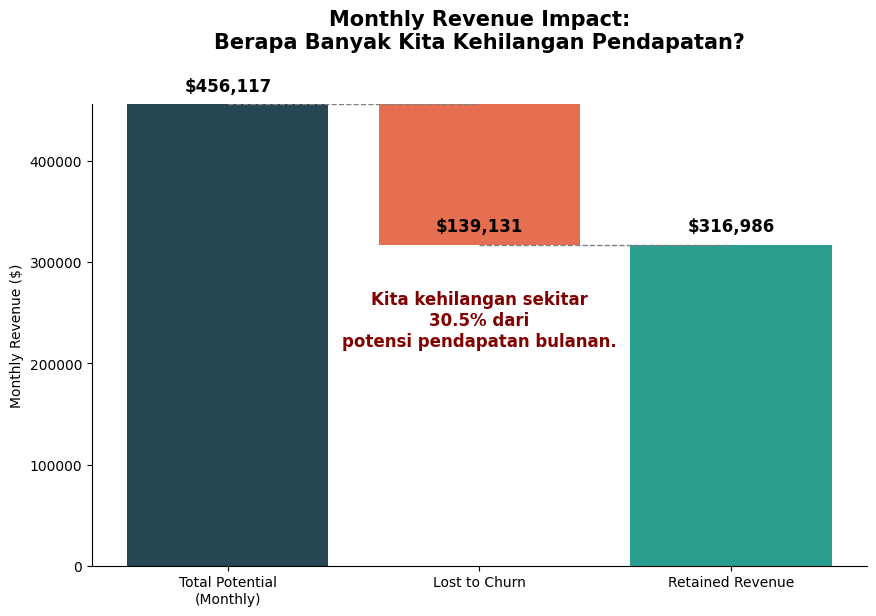

In [67]:
# @title **Apa Dampak nya?**

# Hitung Angka Real dari Data
# Menggunakan Monthly Charges untuk proyeksi revenue bulanan yang hilang
total_potential_revenue = services_demo_status['Monthly Charge'].sum()
revenue_lost = services_demo_status[services_demo_status['Churn Label'] == 'Yes']['Monthly Charge'].sum()
revenue_retained = services_demo_status[services_demo_status['Churn Label'] == 'No']['Monthly Charge'].sum()

# Persiapkan Data untuk Waterfall
values = [total_potential_revenue, -revenue_lost, revenue_retained]
labels = ['Total Potential\n(Monthly)', 'Lost to Churn', 'Retained Revenue']
colors = ['#264653', '#E76F51', '#2A9D8F'] # Dark Teal (Start), Salmon (Loss), Teal (End)

plt.figure(figsize=(10, 6))

# Bar 1: Total Potential (Mulai dari 0)
plt.bar(labels[0], values[0], color=colors[0])

# Bar 2: Loss (Mulai dari ketinggian Total Potential)
plt.bar(labels[1], values[1], bottom=values[0], color=colors[1])

# Bar 3: Retained (Mulai dari 0)
plt.bar(labels[2], values[2], color=colors[2])

# Tambahkan Garis Penghubung (Connector Lines)
plt.plot([0, 1], [values[0], values[0]], color='grey', linestyle='--', linewidth=1)
plt.plot([1, 2], [values[2], values[2]], color='grey', linestyle='--', linewidth=1)

# Anotasi Angka (Dalam Juta/Ribu $)
def currency_format(x):
    return "${:,.0f}".format(x)

for i, v in enumerate(values):
    height = v if i != 1 else values[0] + v # Posisi text untuk bar negatif
    if i == 2: height = v

    # Geser sedikit text-nya
    plt.text(i, height + (max(values)*0.02), currency_format(abs(v)),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.text(1, v-100000, f"Kita kehilangan sekitar\n{revenue_lost/total_potential_revenue:.1%} dari\npotensi pendapatan bulanan.", fontsize=12, color=my_palette['Yes'], ha='center', weight='bold')

plt.title('Monthly Revenue Impact:\nBerapa Banyak Kita Kehilangan Pendapatan?', fontsize=15, pad=40, fontweight='bold')
plt.ylabel('Monthly Revenue ($)')


# Hilangkan garis border atas/kanan biar bersih
sns.despine()

plt.show()

### **EXECUTIVE SUMMARY: Apa yang Terjadi?**

#### 📊 Data Utama
* **Churn Rate:** 26.5%
* **Total Lifetime Revenue Lost:** \$2.86M (Juta Dolar)

#### 🧐 Informasi Chart
1.  **Angka 26.5%** menunjukkan persentase pelanggan yang berhenti berlangganan. Artinya, dari setiap **100 pelanggan** yang kita miliki, sekitar **26 hingga 27 orang** memutuskan untuk pergi.
2.  **Angka $2.86M** adalah akumulasi total uang (Total Charges) yang hilang pada data Q3 ini dicatat akibat kepergian pelanggan tersebut. Ini bukan kerugian sebulan, tapi total "uang yang seharusnya kita miliki jika mereka tidak pergi di bulan Juli-September" .

#### 💡 Actionable Insight
* **Prioritas Retensi:** Strategi *customer retention* harus menjadi prioritas utama dibandingkan *acquisition* (mencari pelanggan baru), karena kebocoran (churn) cukup besar dan harusnya *customer retention* lebih murah.
* **Audit Nilai Pelanggan:** Total kerugian \$2.86 Juta sangat masif. Perusahaan perlu mengaudit apakah biaya untuk mempertahankan pelanggan (misal: diskon, layanan prioritas) jauh lebih murah dibandingkan membiarkan uang \$2.86 Juta ini hilang begitu saja.

---

### **MONTHLY REVENUE IMPACT: Apa Dampaknya?**

#### 📊 Data Utama
* **Total Potential (Potensi Pendapatan):** \$456,117
* **Lost to Churn (Hilang karena Churn):** \$139,131
* **Retained Revenue (Pendapatan Tersisa):** \$316,986
* **Persentase Kehilangan:** 30.5%

#### 🧐 Informasi Chart
1.  **Balok Biru Tua (Kiri):** Ini adalah **posisi start**. Jika tidak ada satu pun pelanggan yang pergi bulan ini, kita akan mengantongi **\$456,117**.
2.  **Balok Merah (Tengah):** Ini adalah **pengurang**. Uang sebesar **\$139,131** "menguap" atau hilang dari kantong perusahaan karena pelanggan melakukan churn.
3.  **Balok Hijau (Kanan):** Ini adalah **hasil akhir**. Uang yang benar-benar masuk ke kas perusahaan hanya **\$316,986**.
4.  **Garis Putus-putus:** Menunjukkan alur pengurangan dari puncak pendapatan potensi turun ke pendapatan aktual.

#### 💡 Actionable Insight
* **Indikasi "High Value Churn":** Perhatikan bahwa *Churn Rate* pelanggannya **26.5%** (dari poin 1), tetapi kehilangan pendapatannya mencapai **30.5%**.
    * *Insight:* Pelanggan yang pergi kemungkinan besar adalah pelanggan yang membayar lebih mahal (High Value Customers) dibandingkan rata-rata, karena persentase uang yang hilang lebih besar daripada persentase orang yang pergi.
* **Efisiensi Bisnis Rendah:** Kita bekerja keras untuk menciptakan potensi $456k, tapi sistem kita gagal menangkap 1/3 dari nilai tersebut. Fokus perbaikan harus pada proses penagihan (billing) atau kepuasan layanan di akhir bulan untuk mencegah *drop* di balok merah.

---

### **📝 KESIMPULAN AKHIR**

Perusahaan sedang mengalami **pendarahan finansial yang serius**.

1.  **Masalah:** Seperempat basis pelanggan (26.5%) meninggalkan layanan.
2.  **Dampak:** Setiap bulan, perusahaan kehilangan **~$139 Ribu Dolar**, yang setara dengan **30.5%** dari total omzet bulanan.
3.  **Rekomendasi Utama:** Segera bentuk tim khusus *Churn Prevention* yang menargetkan pelanggan dengan tagihan tinggi (*High Value*), karena data menunjukkan kehilangan pendapatan secara proporsional lebih besar daripada kehilangan jumlah orang.

## **ANALISIS PROFIL RISIKO DEMOGRAFIS**

Setelah mengetahui *berapa* banyak uang yang hilang, analisis ini menjawab "Siapa" yang pergi dan "Mengapa" demografi tertentu lebih rentan.

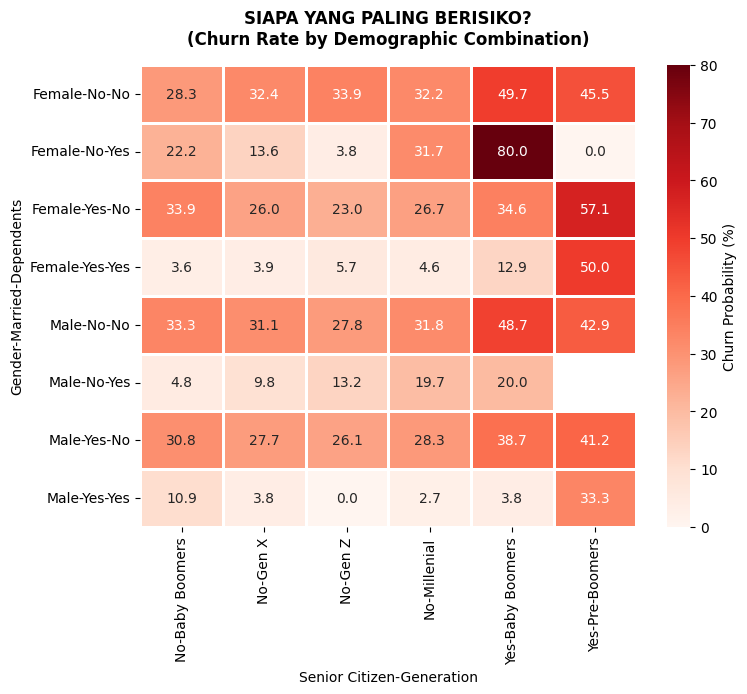

In [68]:
# @title **Siapa Yang Paling Beresiko?**

# Pivot Table Churn Rate berdasarkan Demografi Pelanggan
pivot_demo_risk = demo_status.pivot_table(index=['Gender', 'Married', 'Dependents'],
                        columns=['Senior Citizen', 'Generation'],
                        values='Churn Value',
                        aggfunc='mean') * 100 # Kali 100 biar jadi persen

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_demo_risk, annot=True, fmt='.1f', cmap='Reds',
            cbar_kws={'label': 'Churn Probability (%)'},
            linewidths=1, linecolor='white')

plt.title('SIAPA YANG PALING BERISIKO?\n(Churn Rate by Demographic Combination)', pad=15, fontweight='bold')
plt.show()

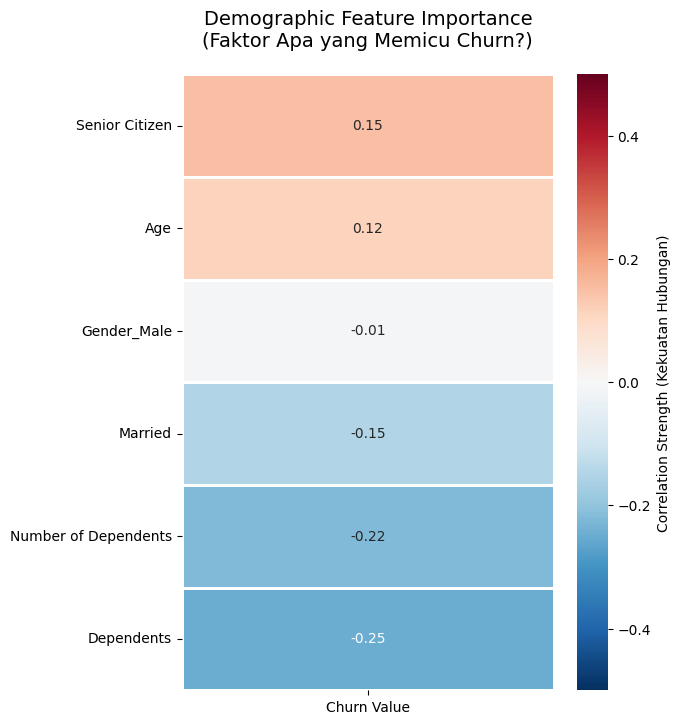

In [69]:
# @title **Faktor Demografi apa yang Paling Memicu Churn?**
# Kita ambil semua aspek: Umur, Gender, Nikah, Tanggungan, Senioritas (Lansia)
demo_cols = ['Age', 'Number of Dependents', 'Gender', 'Married', 'Dependents', 'Senior Citizen', 'Churn Value']
df_heatmap = demo_status[demo_cols].copy()

# Binary Columns (Yes/No -> 1/0)
for col in ['Married', 'Dependents', 'Senior Citizen']:
    # Handle jika datanya Yes/No atau 1/0
    df_heatmap[col] = df_heatmap[col].apply(lambda x: 1 if str(x).lower() in ['yes', '1', 'true'] else 0)

# Gender (Male=1, Female=0 - atau sebaliknya, hanya untuk melihat bedanya)
df_heatmap['Gender_Male'] = df_heatmap['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Hapus kolom Gender asli yg berupa teks
df_heatmap = df_heatmap.drop(columns=['Gender'])

# Kita hanya fokus pada korelasi terhadap 'Churn Label'
corr_matrix = df_heatmap.corr()[['Churn Value']].sort_values(by='Churn Value', ascending=False)

# Hapus baris 'Churn Label' itu sendiri (karena pasti 1.0)
corr_matrix = corr_matrix.drop('Churn Value')

# 4. Visualisasi Heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r', # Red = Positif Churn, Blue = Menahan Churn
            vmin=-0.5, vmax=0.5, # Batas warna agar kontras
            linewidths=1,
            linecolor='white',
            cbar_kws={'label': 'Correlation Strength (Kekuatan Hubungan)'})

plt.title('Demographic Feature Importance\n(Faktor Apa yang Memicu Churn?)', fontsize=14, pad=20)
plt.show()

### **DEMOGRAPHIC FEATURE IMPORTANCE: Faktor Apa yang Memicu Churn?**

#### 📊 Data Utama
* **Faktor Risiko Utama (Positif):** Senior Citizen (+0.15) dan Age (+0.12).
* **Faktor Pelindung Utama (Negatif):** Dependents (-0.25) dan Number of Dependents (-0.22).
* **Faktor Netral:** Gender (-0.01).

#### 🧐 Informasi Chart
1.  **Warna Merah (Korelasi Positif):** Semakin tinggi usia atau status sebagai "Senior Citizen", semakin tinggi kecenderungan pelanggan untuk Churn. Ini menunjukkan produk kita mungkin kurang ramah bagi lansia atau terlalu mahal untuk pensiunan.
2.  **Warna Biru (Korelasi Negatif):** Ini adalah **faktor loyalitas**. Pelanggan yang memiliki tanggungan (Dependents) atau sudah menikah (Married) memiliki kecenderungan Churn yang rendah. Mereka adalah basis pelanggan yang stabil.
3.  **Warna Putih (Netral):** Gender tidak memiliki pengaruh signifikan. Pria dan wanita memiliki perilaku churn yang hampir sama, sehingga strategi berbasis gender tidak akan efektif.

#### 💡 Actionable Insight
* **Strategi "Family Locking":** Karena pelanggan dengan tanggungan (Dependents) sangat loyal, perusahaan harus agresif mempromosikan **Paket Keluarga (Family Plan)** atau bundling. Tujuannya adalah membuat pelanggan *single* merasa lebih terikat ("terkunci") dalam ekosistem layanan, misalnya seperti Bundling Layanan, Jika dia single, tawarkan paket Internet Rumah + Kuota HP + Langganan Streaming (Netflix/Disney+) dalam satu harga murah.Mempersulit orang Single untuk pergi begitu saja dengan cara menciptakan ketergantungan pada orang lain (teman/partner) atau pada layanan lain (bundling), sehingga mereka "terpaksa" setia.
* **Evaluasi UX untuk Lansia:** Tingginya churn pada *Senior Citizen* dan *Age* mengindikasikan adanya hambatan. Perlu dicek apakah aplikasi/layanan terlalu rumit (masalah teknis) atau apakah harga terlalu tinggi untuk pendapatan pensiun (masalah harga).

---

### **DEMOGRAPHIC RISK MAPPING: Siapa yang Paling Berisiko?**

#### 📊 Data Utama
* **Segmen Paling Bahaya (Critical):** Wanita, Tidak Menikah, Punya Tanggungan (Female-No-Yes) dari kalangan **Baby Boomers**. Churn Rate: **80.0%**.
* **Segmen Risiko Tinggi (High Risk):** Kelompok Senior Citizen (Baby Boomers & Pre-Boomers) secara umum memiliki Churn Rate di atas **30% - 50%**.
* **Segmen Teraman:** Pria Menikah dengan Tanggungan (Male-Yes-Yes) dari Generasi Z memiliki Churn Rate **0.0%**.

#### 🧐 Informasi Chart
1.  **Zona Merah (Kanan):** Kolom *Yes-Baby Boomers* dan *Yes-Pre-Boomers* didominasi warna merah/oranye. Ini mengonfirmasi temuan sebelumnya bahwa usia lanjut adalah faktor risiko terbesar, terlepas dari status pernikahan.
2.  **Anomali 80%:** Ada satu kotak merah pekat (80%) pada baris *Female-No-Yes*. Ini adalah anomali ekstrem. Hampir seluruh wanita lansia (Boomer) yang *single* tapi menanggung seseorang, memutuskan untuk berhenti berlangganan.
3.  **Pola Stabilitas (Kiri Bawah):** Generasi muda (Gen Z & Millennial) yang sudah menikah atau punya tanggungan (baris *Yes-Yes*) memiliki warna sangat pudar, menandakan retensi yang sangat baik.

#### 💡 Actionable Insight
* **Investigasi Segmen Mikro (Micro-segment Investigation):** Angka **80%** pada *Female-No-Yes (Boomer)* sangat tidak wajar. Tim harus segera menghubungi sampel dari grup ini. Hipotesisnya adalah Ini mungkin janda pensiunan yang menjadi kepala keluarga namun merasa terbebani biaya langganan, atau mungkin mereka mengalami kesulitan teknis yang tidak terselesaikan.
* **Program Loyalitas Senior:** Jangan perlakukan Senior Citizen sama dengan Gen Z. Tawarkan "Diskon Pensiunan" atau layanan pelanggan jalur khusus (telepon vs chat bot) untuk menurunkan warna merah di sisi kanan grafik.

---

### **📝 KESIMPULAN AKHIR (DEMOGRAFI)**

Profil pelanggan kita terbagi menjadi dua dunia:

1.  **Dunia Stabil (Safe Zone):** Keluarga muda dan individu produktif yang memiliki tanggungan. Mereka sangat setia. Strategi: *Upselling & Cross-selling*.
2.  **Dunia Rentan (Danger Zone):** Senior Citizen dan individu yang tidak terikat (Single). Mereka sangat mudah pergi. Strategi: *Simplifikasi Layanan & Penyesuaian Harga Khusus*.

## **ANALISIS FAKTOR LAYANAN & ALASAN CHURN**

Setelah mengetahui profil demografis, analisis ini masuk lebih dalam ke aspek **Produk/Layanan** dan **Alasan Kompetitif** untuk memahami akar masalah operasional.

/tmp/ipython-input-2605555233.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors)


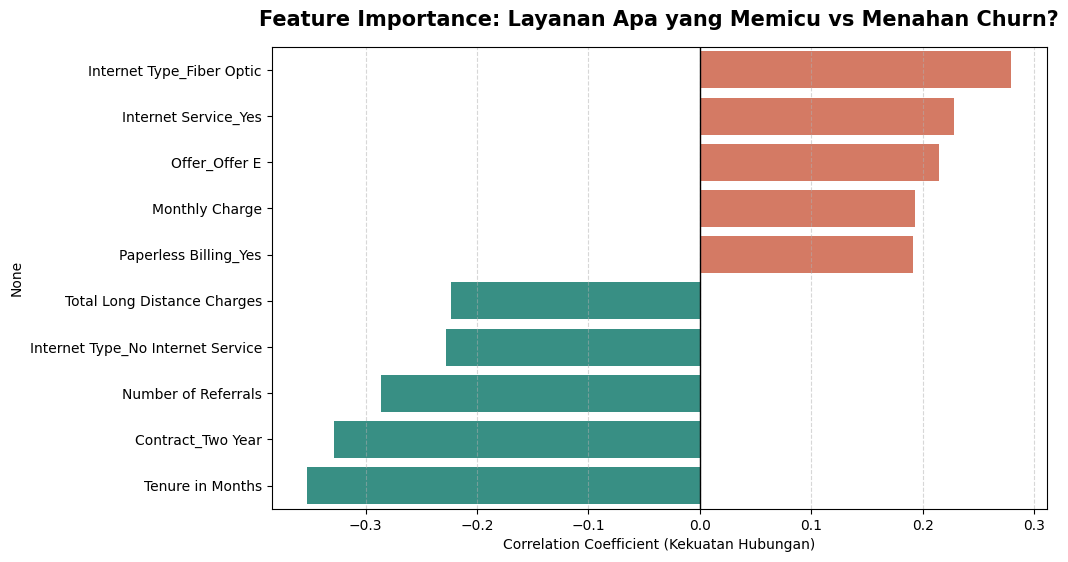

In [70]:
# @title **Layanan Mana yang Memicu & Menahan Churn?**

# Gabungkan layanan dengan status churn
services_churn = pd.merge(df_services, df_status[['Customer ID', 'Churn Label']], on='Customer ID')

# Kita gunakan pd.get_dummies untuk memecah kategori (misal: Internet Service -> Internet_DSL, Internet_Fiber, Internet_No)
data_corr = pd.get_dummies(services_churn.drop(columns=['Customer ID', 'Count', 'Quarter']), drop_first=True)

# Pastikan Churn Label jadi angka (Yes=1)
# Note: get_dummies biasanya membuat 'Churn Label_Yes', kita cari kolom itu
target = 'Churn Label_Yes'

# Hitung Korelasi terhadap Churn
correlations = data_corr.corr()[target].sort_values(ascending=False)

# Hapus target itu sendiri
correlations = correlations.drop(target)

# Ambil Top 10 Faktor Pemicu (Positif) dan Top 10 Penahan (Negatif)
top_positive = correlations.head(5)
top_negative = correlations.tail(5)
top_corr = pd.concat([top_positive, top_negative])

# Visualisasi Diverging Bar Chart
plt.figure(figsize=(10, 6))

# Tentukan warna: Merah untuk korelasi positif (Bahaya), Teal untuk negatif (Bagus)
colors = ['#E76F51' if x > 0 else '#2A9D8F' for x in top_corr.values]

sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors)

plt.axvline(0, color='black', linewidth=1) # Garis tengah
plt.title('Feature Importance: Layanan Apa yang Memicu vs Menahan Churn?', fontsize=15, pad=15, fontweight='bold')
plt.xlabel('Correlation Coefficient (Kekuatan Hubungan)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

/tmp/ipython-input-614462554.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_pareto_top.index, rotation=45, ha='right')


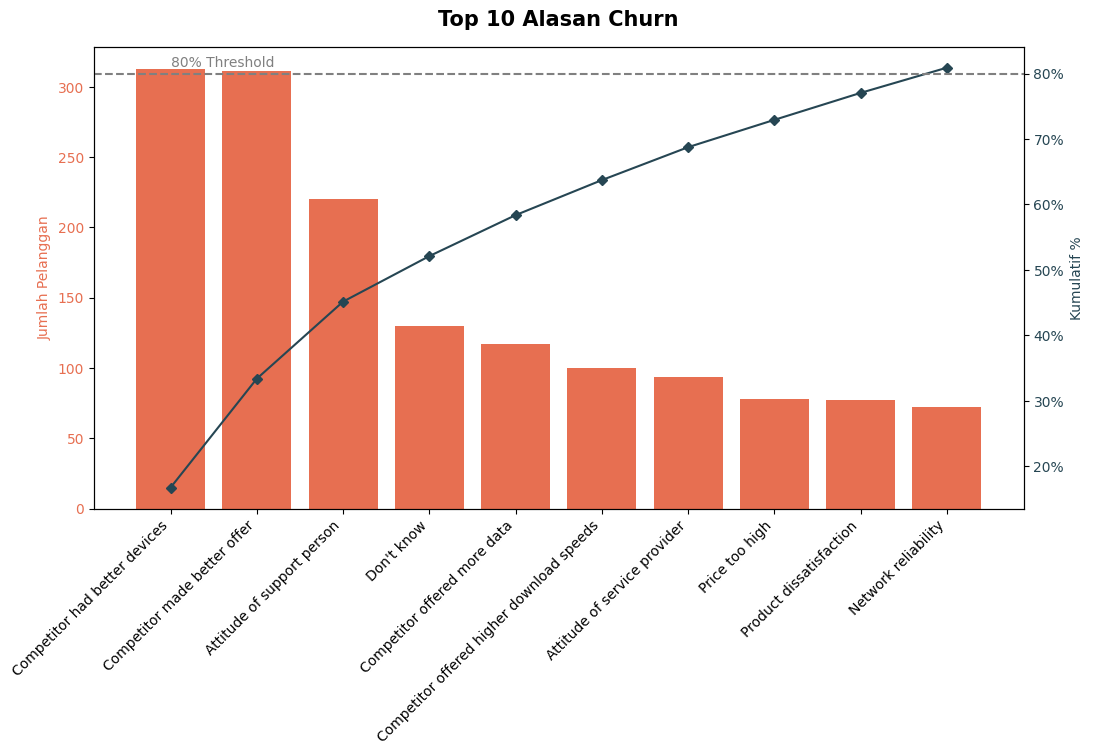

In [71]:
# @title **Mengapa Pelanggan Memilih untuk Churn?**
from matplotlib.ticker import PercentFormatter

# 1. Hitung Frekuensi Alasan
reason_counts = df_status[df_status['Churn Label'] == 'Yes']['Churn Reason'].value_counts()
df_pareto = pd.DataFrame({'count': reason_counts})

# 2. Hitung Persentase Kumulatif
df_pareto['cumperc'] = df_pareto['count'].cumsum() / df_pareto['count'].sum() * 100

# Ambil Top 10 Alasan saja agar grafik terbaca
df_pareto_top = df_pareto.head(10)

# 3. Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart (Jumlah)
ax1.bar(df_pareto_top.index, df_pareto_top['count'], color='#E76F51')
ax1.set_ylabel('Jumlah Pelanggan', color='#E76F51')
ax1.tick_params(axis='y', labelcolor='#E76F51')
ax1.set_xticklabels(df_pareto_top.index, rotation=45, ha='right')

# Line Chart (Kumulatif %)
ax2 = ax1.twinx()
ax2.plot(df_pareto_top.index, df_pareto_top['cumperc'], color='#264653', marker='D', ms=5)
ax2.set_ylabel('Kumulatif %', color='#264653')
ax2.tick_params(axis='y', labelcolor='#264653')
ax2.yaxis.set_major_formatter(PercentFormatter())

# Garis Batas 80%
ax2.axhline(80, color='grey', linestyle='--')
ax2.text(0, 81, '80% Threshold', color='grey')

plt.title('Top 10 Alasan Churn', fontsize=15, pad=15, fontweight='bold')
plt.show()

### **SERVICE FEATURE IMPORTANCE: Layanan Apa yang Memicu vs Menahan Churn?**

#### 📊 Data Utama
* **Pemicu Churn Terbesar (Red Flags):** Internet Type Fiber Optic (Koefisien > 0.25) dan Offer E.
* **Penahan Churn Terkuat (Green Flags):** Tenure in Months (Koefisien < -0.35) dan Contract Two Year (< -0.30).
* **Faktor Biaya:** Monthly Charge berkorelasi positif dengan Churn (semakin mahal, semakin ingin pindah).

#### 🧐 Informasi Chart
1.  **Masalah Fiber Optic:** Balok merah teratas menunjukkan bahwa pelanggan pengguna *Fiber Optic* justru yang paling banyak kabur. Ini ironis karena biasanya Fiber Optic adalah layanan premium. Ada indikasi kuat masalah kualitas teknis atau harga yang *overpriced*.
2.  **Bahaya "Offer E":** Salah satu penawaran promosi, yaitu "Offer E", memiliki korelasi positif dengan Churn. Artinya, pelanggan yang mengambil promo ini cenderung tidak puas dan pergi.
3.  **Kekuatan Kontrak Panjang:** Balok hijau *Contract_Two Year* menunjukkan bahwa pelanggan dengan kontrak 2 tahun sangat kecil kemungkinannya untuk Churn dibandingkan pelanggan bulanan.

#### 💡 Actionable Insight
* **Audit Kualitas Fiber Optic:** Segera lakukan pengecekan teknis pada infrastruktur Fiber Optic. Jika jaringannya tidak stabil namun harganya premium, ini adalah resep bencana churn.
* **Hentikan "Offer E":** Promosi ini terbukti gagal mempertahankan pelanggan. Tim marketing harus segera merevisi atau menghapus skema penawaran ini.
* **Dorong Migrasi Kontrak:** Buat insentif (diskon atau bonus data) bagi pelanggan bulanan yang bersedia beralih ke *Two Year Contract*. Ini adalah cara paling efektif untuk "mengunci" loyalitas.

---

### **PARETO CHART: Top 10 Alasan Mengapa Mereka Pergi?**

#### 📊 Data Utama
* **Alasan #1:** Competitor had better devices (Kompetitor punya perangkat lebih baik).
* **Alasan #2:** Competitor made better offer (Kompetitor memberi penawaran lebih baik).
* **Alasan #3:** Attitude of support person (Sikap staf support buruk).
* **Kumulatif:** 3 alasan teratas menyumbang hampir **50%** dari total penyebab Churn.

#### 🧐 Informasi Chart
1.  **Kalah Persaingan (Eksternal):** Dua balok tertinggi (oranye) berkaitan dengan *Competitor*. Pelanggan merasa tetangga sebelah memiliki perangkat (modem/router) yang lebih canggih dan harga yang lebih miring.
2.  **Luka Sendiri (Internal):** Alasan ke-3, *"Attitude of support person"*, adalah masalah internal yang sangat fatal. Pelanggan pergi bukan karena produk, tapi karena merasa diperlakukan buruk oleh staf kita.
3.  **Ambang Batas 80%:** Garis putus-putus menunjukkan bahwa jika kita bisa menyelesaikan 6-7 masalah pertama (dari kiri), kita sudah bisa menghilangkan 80% penyebab Churn.

#### 💡 Actionable Insight
* **Competitive Intelligence:** Perusahaan perlu meriset perangkat apa yang diberikan kompetitor. Apakah modem kita sudah usang? Lakukan *upgrade* perangkat untuk pelanggan setia.
* **Pelatihan Empati CS:** Masalah *"Attitude of support person"* tidak bisa ditoleransi. Lakukan *retraining* besar-besaran untuk tim Customer Service dengan fokus pada empati dan penanganan keluhan.
* **Counter-Offer Strategy:** Jika alasan utama adalah "Better Offer" dari lawan, tim retensi harus dibekali wewenang untuk memberikan diskon tandingan (*price match*) saat pelanggan minta putus.

---

### **📝 KESIMPULAN AKHIR (LAYANAN & ALASAN)**

Penyebab Churn di perusahaan ini adalah kombinasi dari **Kalah Teknologi** dan **Buruknya Pelayanan**.

1.  **Produk:** Layanan Fiber Optic yang seharusnya unggulan justru menjadi penyumbang churn terbesar, diperparah dengan perangkat yang kalah canggih dari kompetitor.
2.  **Manusia:** Sikap staf support menjadi alasan ke-3 terbesar pelanggan pergi.
3.  **Rekomendasi Utama:** Perbaiki kualitas jaringan Fiber Optic, ganti perangkat lama pelanggan, dan perbaiki budaya pelayanan (Service Culture).

## **ANALISIS SIKLUS HIDUP PELANGGAN (TENURE)**

Analisis ini berfokus pada dimensi **Waktu**. Kita akan melihat pada bulan keberapa pelanggan paling rentan meninggalkan perusahaan, untuk menentukan kapan waktu terbaik melakukan intervensi.

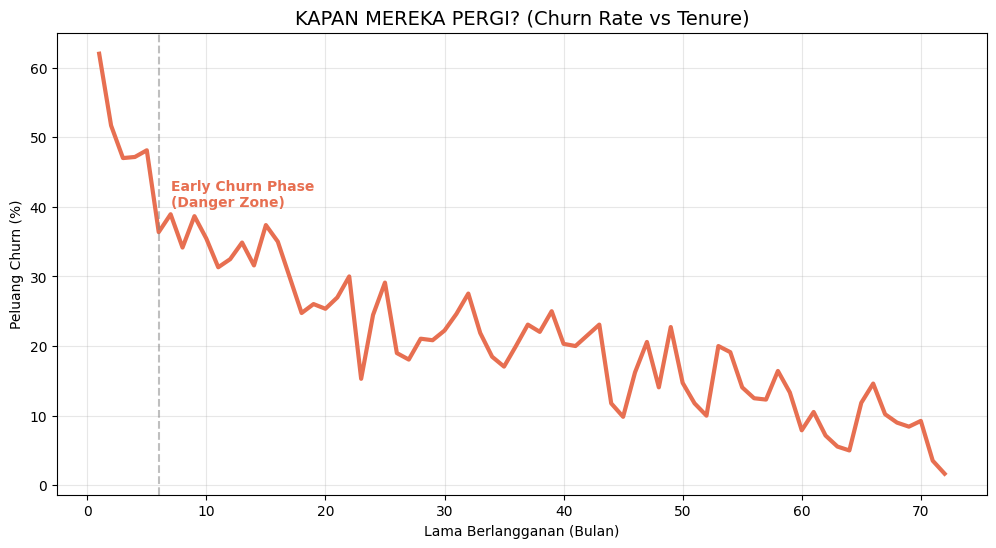

In [72]:
# @title **Kapan Mereka Pergi?**

# Group by Tenure dan hitung Mean (Rata-rata Churn)
churn_by_tenure = services_demo_status.groupby('Tenure in Months')['Churn Value'].mean() * 100
churn_by_tenure = churn_by_tenure.reset_index()

# 2. Visualisasi
plt.figure(figsize=(12, 6))

# Plot Garis
sns.lineplot(data=churn_by_tenure, x='Tenure in Months', y='Churn Value',
             color='#E76F51', linewidth=3)

# 3. Anotasi Area Berbahaya
plt.axvline(x=6, color='grey', linestyle='--', alpha=0.5)
plt.text(7, 40, 'Early Churn Phase\n(Danger Zone)', color='#E76F51', fontweight='bold')

plt.title('KAPAN MEREKA PERGI? (Churn Rate vs Tenure)', fontsize=14)
plt.xlabel('Lama Berlangganan (Bulan)')
plt.ylabel('Peluang Churn (%)')
plt.grid(True, alpha=0.3)

plt.show()

### **CHURN LIFECYCLE: Kapan Titik Kritis Terjadi?**

#### 📊 Data Utama
* **Titik Puncak Churn (The Cliff):** Bulan ke-1 (Bulan pertama berlangganan) memiliki risiko churn tertinggi, menembus angka **>60%**.
* **Zona Bahaya (Danger Zone):** Bulan **0 hingga 6** ditandai sebagai fase paling kritis.
* **Fase Stabil:** Setelah bulan ke-60, tingkat churn turun drastis dan stabil di bawah 10%.

#### 🧐 Informasi Chart
1.  **Kesan Pertama yang Buruk:** Garis grafik melonjak sangat tinggi di paling kiri (awal sumbu X). Ini menunjukkan bahwa mayoritas pelanggan pergi justru saat mereka baru saja mencoba layanan. Ada kegagalan fatal dalam proses *Onboarding* atau instalasi awal.
2.  **Kurva Menurun (L-Shape):** Grafik menunjukkan pola menurun yang konsisten. Semakin lama seseorang bertahan (geser ke kanan), semakin kecil kemungkinan mereka untuk pergi. Ini mengonfirmasi bahwa loyalitas terbentuk seiring waktu.
3.  **Garis Putus-putus (Threshold):** Penanda vertikal di sekitar bulan ke-6 memisahkan antara "Pelanggan Baru yang Coba-coba" dengan "Pelanggan Tetap". Jika kita bisa menahan pelanggan melewati garis ini, kemungkinan besar mereka akan setia selamanya.

#### 💡 Actionable Insight
* **Program "First 90 Days":** Jangan fokus memberi diskon pada pelanggan lama (karena mereka sudah setia). Alihkan budget retensi untuk memanjakan pelanggan baru di 3 bulan pertama. Berikan *Welcome Call*, *Priority Support*, atau pendampingan teknis intensif.
* **Perbaiki Proses Instalasi:** Churn >60% di bulan pertama adalah indikator kuat bahwa produk "gagal nyala" atau tidak sesuai ekspektasi saat dipasang. Audit tim teknisi lapangan dan proses aktivasi layanan.
* **Kontrak Pengikat:** Mengingat tingginya churn di awal, strategi mewajibkan kontrak 1 atau 2 tahun (seperti temuan di analisis sebelumnya) sangat valid untuk memaksa pelanggan melewati masa kritis ini.

---

### **📝 REKOMENDASI STRATEGIS KOMPREHENSIF (FINAL)**

Berdasarkan keseluruhan analisis (Finansial, Demografi, Layanan, dan Waktu), berikut adalah **3 Pilar Strategi Anti-Churn**:

1.  **FIX THE ONBOARDING (Pilar Waktu):**
    * Masalah terbesar ada di pintu masuk. Pelanggan baru langsung pergi. Buat tim "Onboarding Specialist" untuk memastikan 6 bulan pertama berjalan mulus tanpa kendala teknis.

2.  **UPGRADE THE TECH (Pilar Produk):**
    * Layanan Fiber Optic dan perangkat (Device) kalah saing dari kompetitor. Lakukan peremajaan perangkat keras (modem/router) untuk menandingi tawaran kompetitor.

3.  **LOCK THE FAMILY (Pilar Demografi):**
    * Segmen *Single & Senior* sangat rapuh. Fokuskan marketing pada paket *Bundling Keluarga* untuk mengikat pelanggan agar lebih sulit berpindah (meningkatkan *Switching Cost*).

## **ANALISIS PERILAKU PEMBAYARAN (PRICE SENSITIVITY)**

Analisis ini membedah hubungan antara seberapa banyak uang yang dikeluarkan pelanggan (*Monthly Charge*) dengan keputusan mereka untuk bertahan atau pergi.

/tmp/ipython-input-313858055.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sensitivity = services_demo_status.groupby('Charge Category')['Churn Value'].mean() * 100
/tmp/ipython-input-313858055.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=price_sensitivity, x='Charge Category', y='Churn Value',


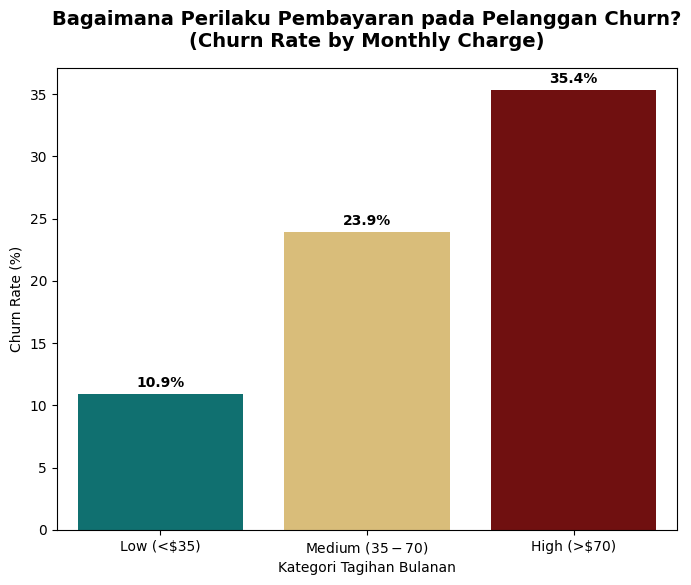

In [73]:
# @title **Bagaimana Perilaku Pembayaran Mereka?**

# 1. Buat Kategori Harga (Binning)
# Kita bagi Monthly Charge menjadi 3 kategori: Low, Medium, High
services_demo_status['Charge Category'] = pd.cut(services_demo_status['Monthly Charge'],
                                                 bins=[0, 35, 70, 200],
                                                 labels=['Low (<$35)', 'Medium ($35-$70)', 'High (>$70)'])


price_sensitivity = services_demo_status.groupby('Charge Category')['Churn Value'].mean() * 100
price_sensitivity = price_sensitivity.reset_index()

# 3. Visualisasi
plt.figure(figsize=(8, 6))

# Barplot
ax = sns.barplot(data=price_sensitivity, x='Charge Category', y='Churn Value',
                 palette=[my_palette['No'], '#E9C46A', my_palette['Yes']])
                 # Warna kustom: Hijau (Aman), Kuning (Waspada), Merah (Bahaya)

plt.title('Bagaimana Perilaku Pembayaran pada Pelanggan Churn?\n(Churn Rate by Monthly Charge)', fontsize=14, pad=15, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Kategori Tagihan Bulanan')

# Label Angka
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontweight='bold')

plt.show()

### **PRICE TIER ANALYSIS: Apakah Harga Tinggi Memicu Churn?**

#### 📊 Data Utama
* **Segmen High Value (Tagihan >\$70):** Memiliki Churn Rate tertinggi di angka **35.4%**.
* **Segmen Low Value (Tagihan <\$35):** Memiliki Churn Rate terendah, hanya **10.9%**.
* **Segmen Medium (\$35 - \$70):** Berada di tengah-tengah dengan **23.9%**.

#### 🧐 Informasi Chart
1.  **Pola Tangga (Linear Trend):** Grafik menunjukkan kenaikan yang sangat rapi. Semakin mahal tagihan bulanan, semakin tinggi persentase pelanggan yang kabur. Tidak ada anomali; ini murni masalah *Price Sensitivity*.
2.  **Kesenjangan Ekstrem:** Risiko churn pada pelanggan yang membayar mahal (High) adalah **3 kali lipat lebih besar** dibandingkan pelanggan hemat (Low).
3.  **Korelasi dengan Fiber Optic:** Mengingat temuan sebelumnya bahwa layanan *Fiber Optic* memiliki churn tinggi, dan biasanya Fiber Optic harganya mahal (>$70), data ini saling menguatkan. Pelanggan membayar harga premium tetapi merasa tidak mendapatkan kualitas premium (ingat alasan: *Competitor had better devices*).

#### 💡 Actionable Insight
* **Strategi "Value Justification":** Untuk pelanggan dengan tagihan >\$70, perusahaan tidak boleh hanya mengirim tagihan. Kirimkan juga "Monthly Value Report" (misal: "Anda telah menghemat 30GB data bulan ini") agar mereka merasa biaya yang dikeluarkan sepadan.
* **Opsi Down-selling:** Sebelum pelanggan *High Value* benar-benar memutus kontrak (Churn), tawarkan mereka untuk turun ke paket *Medium*. Lebih baik pendapatan turun sedikit daripada hilang total (\$0).
* **Audit Harga Kompetitor:** Churn 35.4% di segmen premium adalah tanda bahaya. Kemungkinan besar kompetitor menawarkan spesifikasi yang sama (High Speed) dengan harga di rentang *Medium* (\$50-\$60). Lakukan penyesuaian harga atau beri bonus *speed booster*.

---

### **📝 RANGKUMAN EKSEKUTIF (THE DATA STORY)**

Jika digabungkan dari awal hingga akhir, inilah cerita data (*Data Storytelling*) yang bisa kamu sampaikan di portofolio:

1.  **Masalah Utama:** Perusahaan kehilangan **\$2.86 Juta** pendapatan potensial karena tingkat Churn yang tinggi (**26.5%**).
2.  **Siapa Pelakunya:** Churn didominasi oleh **Senior Citizen** dan pelanggan **Single** (tidak punya tanggungan).
3.  **Mengapa Mereka Pergi:**
    * Secara Teknis: Layanan **Fiber Optic** dan perangkat (**Devices**) dianggap kalah canggih dibanding kompetitor.
    * Secara Finansial: Harga di atas **\$70/bulan** dianggap terlalu mahal (*Overpriced*) untuk kualitas yang didapat.
    * Secara Layanan: Sikap staf support yang buruk.
4.  **Kapan Mereka Pergi:** Bahaya terbesar ada di **Bulan ke-1 hingga Bulan ke-6**.

**Rekomendasi Strategis:**
Fokus perbaikan harus pada **"Retensi Pelanggan Premium Baru"**.
Perbaiki pengalaman *onboarding* di 3 bulan pertama, berikan perangkat modem terbaru untuk pelanggan paket >$70, dan latih staf support untuk lebih empatik.

## **ANALISIS GEOGRAFIS (REGIONAL HOTSPOTS)**

Analisis ini menjawab pertanyaan **"DIMANA"** lokasi kebocoran terbesar terjadi. Mendeteksi lokasi spesifik memungkinkan perusahaan melakukan intervensi yang terarah (lokal) dan hemat biaya, daripada melakukan perbaikan massal yang tidak perlu.

/tmp/ipython-input-584842633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


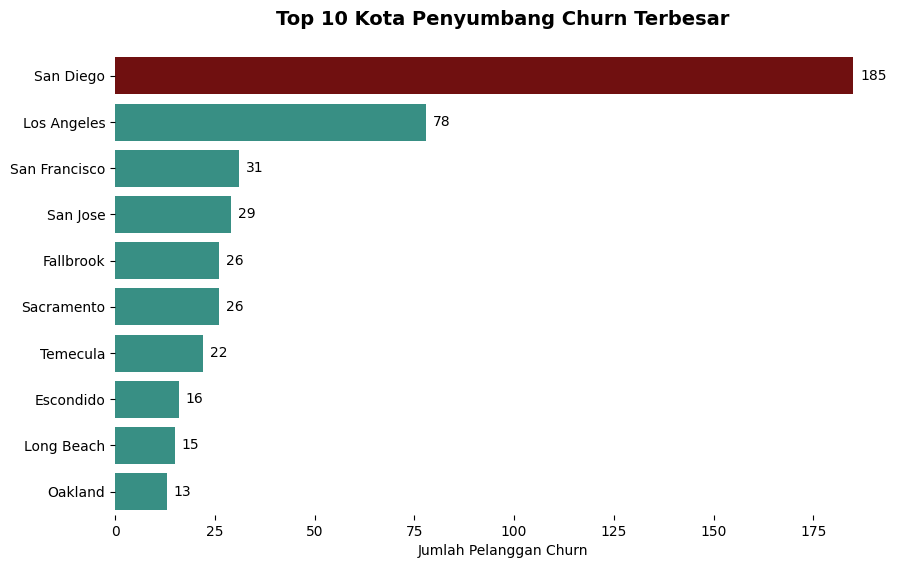

In [74]:
# @title **Dimana Titik Pusat Churn yang Menjadi Sumber Masalah?**
churn_city = cust_location[cust_location['Churn Label'] == 'Yes'].groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:10]
churn_city.rename(columns={'Customer ID': 'Total Churn'}, inplace=True)

# Membuat Palette Warna: San Diego Merah, Sisanya Abu-abu
# Ini teknik "Pre-attentive Attributes" untuk mengarahkan mata audiens
colors = [my_palette['Yes'] if city == 'San Diego' else '#2A9D8F' for city in churn_city['City']]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=churn_city,
    y='City',           # Tukar X dan Y untuk jadi Horizontal
    x='Total Churn',
    palette=colors      # Gunakan warna custom tadi
)

# Menambah Label Angka di ujung bar
for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.0f', fontsize=10, color='black')

plt.title('Top 10 Kota Penyumbang Churn Terbesar', pad=20, fontweight='bold', fontsize=14)
plt.xlabel('Jumlah Pelanggan Churn')
plt.ylabel('')
sns.despine(left=True, bottom=True) # Menghilangkan garis pinggir agar bersih
plt.show()

/tmp/ipython-input-3617710948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


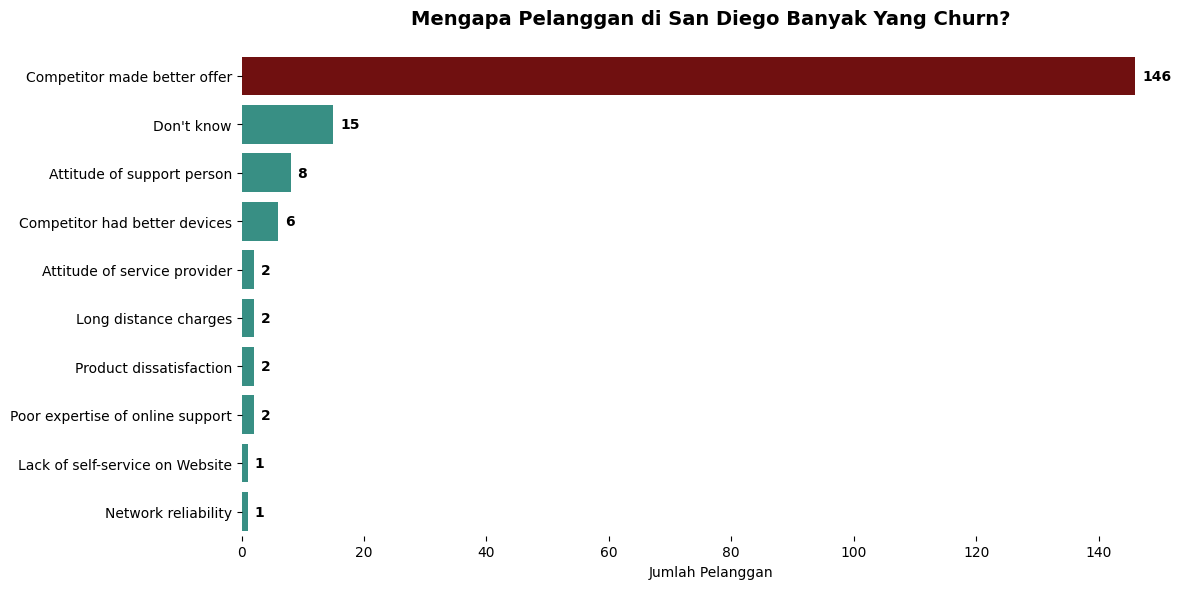

In [75]:
# @title **Apa Alasan Mereka Churn?**
churn_reason_sandiego = cust_location[(cust_location['Churn Label'] == 'Yes') & (cust_location['City'] == 'San Diego')].groupby('Churn Reason')['Customer ID'].count().sort_values(ascending=False).reset_index()[0:10]
churn_reason_sandiego.rename(columns={'Customer ID': 'Count'}, inplace=True)

# Highlight Alasan #1
colors_reason = [my_palette['Yes'] if i == 0 else '#2A9D8F' for i in range(len(churn_reason_sandiego))]

plt.figure(figsize=(12, 6)) # Lebarkan sedikit agar teks muat
ax = sns.barplot(
    data=churn_reason_sandiego,
    y='Churn Reason',   # Horizontal Chart
    x='Count',
    palette=colors_reason
)

# Label Angka
for container in ax.containers:
    ax.bar_label(container, padding=5, fmt='%.0f', fontweight='bold')

plt.title('Mengapa Pelanggan di San Diego Banyak Yang Churn?', pad=20, fontweight='bold', fontsize=14)
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('')
plt.tight_layout() # Agar teks panjang tidak terpotong
sns.despine(left=True, bottom=True)
plt.show()

### **GEOGRAPHIC CHURN MAPPING: Kota Mana yang Paling Berdarah?**

#### 📊 Data Utama
* **Pusat Krisis (Epicenter):** San Diego adalah penyumbang churn terbesar dengan **185 pelanggan** hilang.
* **Gap Signifikan:** Jumlah churn di San Diego lebih dari **2x lipat** dibandingkan kota kedua, Los Angeles (78 pelanggan).
* **Konsentrasi:** Masalah tidak merata di seluruh wilayah, melainkan sangat terpusat (terlokalisasi) di San Diego.

#### 🧐 Informasi Chart
1.  **Anomali Merah:** Batang merah panjang di paling atas (San Diego) menunjukkan bahwa kota ini adalah *outlier*. Ini bukan tren umum, melainkan kejadian luar biasa (anomali) di satu lokasi spesifik.
2.  **Disparitas Ekstrem:** Perhatikan jarak antara San Diego (185) dan Los Angeles (78). Biasanya, kota-kota besar memiliki angka yang berdekatan. Kesenjangan yang lebar ini mengindikasikan adanya "serangan" atau gangguan spesifik yang hanya terjadi di San Diego.

#### 💡 Actionable Insight
* **Red Zone Alert:** Tetapkan San Diego sebagai "Zona Merah". Jangan terapkan strategi nasional di sini. San Diego membutuhkan **Tim Satgas Khusus (Task Force)**.
* **Investigasi Infrastruktur vs Kompetisi:** Tingginya churn di satu kota biasanya disebabkan oleh dua hal: Menara pemancar (BTS) yang roboh/rusak, atau Kompetitor baru yang masuk ke wilayah tersebut. (Kita akan menjawab ini di chart berikutnya).

---

### **SAN DIEGO DEEP DIVE: Mengapa Mereka Kabur Massal?**

#### 📊 Data Utama
* **Penyebab Mutlak:** Sebanyak **146 pelanggan** (dominasi total) pergi karena alasan *"Competitor made better offer"* (Kompetitor memberikan penawaran lebih baik).
* **Bukan Masalah Teknis:** Alasan teknis seperti *"Network Reliability"* hanya berjumlah **1 pelanggan**.
* **Bukan Masalah Support:** Alasan *"Attitude of support person"* hanya 8 pelanggan.

#### 🧐 Informasi Chart
1.  **Satu Penyebab Dominan:** Grafik ini hampir "monolitik". Batang merah tua mendominasi seluruh layar. Ini membuktikan bahwa pelanggan San Diego tidak kecewa dengan sinyal atau pelayanan kita. Mereka pergi murni karena **uang/harga**.
2.  **Perang Harga (Price War):** Fakta bahwa 146 orang menyebut "Better Offer" mengonfirmasi bahwa ada kompetitor yang sedang melakukan strategi *bakar uang* atau promosi agresif khusus di wilayah San Diego.

#### 💡 Actionable Insight
* **Counter-Attack Campaign:** Segera luncurkan promo *"San Diego Special Deal"*. Kita harus melakukan *Price Matching* (menyamakan harga) atau memberikan bonus kuota lebih besar khusus untuk penduduk San Diego guna mematahkan tawaran kompetitor.
* **Competitive Intelligence:** Kirim tim intelijen bisnis ke lapangan di San Diego. Cari tahu siapa kompetitor ini dan seperti apa brosur/paket yang mereka tawarkan. Kita tidak bisa menang jika tidak tahu senjata musuh.
* **Win-Back Strategy:** Hubungi 146 pelanggan yang baru saja pergi ini. Tawarkan paket *"Come Back Home"* dengan diskon agresif. Biaya diskon ini jauh lebih murah daripada kehilangan pangsa pasar di kota sebesar San Diego.

---

### **📝 KESIMPULAN AKHIR (REGIONAL)**

Masalah di San Diego adalah studi kasus klasik tentang **Persaingan Pasar (Market Competition)**, bukan Kegagalan Produk.

1.  **Masalah:** Churn meledak di San Diego (185 orang).
2.  **Diagnosa:** Infrastruktur jaringan sehat (hampir tidak ada keluhan sinyal). Pelanggan dibajak oleh kompetitor yang menawarkan harga lebih murah.
3.  **Rekomendasi:** Lakukan perang harga lokal di San Diego. Jangan ubah kualitas jaringan, tapi ubah struktur penawaran harga khusus di kode pos wilayah ini.

In [76]:
df_zip_code = df_location.groupby(['City', 'Zip Code'])['Customer ID'].count().sort_values(ascending=False).reset_index()
df_zip_code.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
df_zip_code

,City,Zip Code,Customer Count
0,Fallbrook,92028,43
1,Escondido,92027,38
2,San Diego,92122,36
3,San Diego,92117,34
4,San Diego,92126,32
...,...,...,...
1621,Jacumba,91934,2
1622,Johannesburg,93528,2
1623,Holtville,92250,2
1624,Eldridge,95431,2


In [77]:
df_zip_code = df_location.groupby(['City', 'Zip Code'])['Customer ID'].count().sort_values(ascending=False).reset_index()
df_zip_code.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
df_zip_code

zipcode = pd.merge(df_zip_code[['City', 'Zip Code', 'Customer Count']], df_population.drop(columns=['ID']), on='Zip Code', how='right')
zipcode['City'] = zipcode['City'].fillna('Unknown')
zipcode['Customer Count'] = zipcode['Customer Count'].fillna(0)
zipcode['Customer Count'] = zipcode['Customer Count'].astype(int)
zipcode[zipcode['Customer Count'] == 0].sort_values(by='Population', ascending=False)

,City,Zip Code,Customer Count,Population
223,Unknown,91402,0,66249
1095,Unknown,95023,0,47514
18,Unknown,90020,0,42394
434,Unknown,92307,0,31876
782,Unknown,93555,0,29782
1328,Unknown,95531,0,23792
423,Unknown,92277,0,17178
1671,Unknown,96161,0,15783
818,Unknown,93640,0,9174
1609,Unknown,96064,0,4592


### **WHITE SPACE ANALYSIS: Di Mana Peluang Terbesar?**

#### 📊 Data Utama
* **Top Opportunity:** Zip Code **91402** memiliki populasi **66.249 jiwa**, namun perusahaan memiliki **0 pelanggan** di sana.
* **Runner-up:** Zip Code **95023** memiliki populasi **47.514 jiwa** dengan **0 pelanggan**.
* **Total Market:** Teridentifikasi lebih dari 46 kode pos dengan populasi yang belum terjamah sama sekali yang didalamnya ada 8 kode pos dengan populasi yang signifikan.

#### 🧐 Insight Bisnis
1.  **Blind Spot Marketing:** Fakta bahwa ada wilayah dengan 66 ribu penduduk tanpa satu pun pelanggan mengindikasikan bahwa area ini terlewat dari jangkauan infrastruktur jaringan atau target marketing kita.
2.  **Substitusi Revenue:** Jika kita kehilangan pendapatan dari Churn di San Diego, kita bisa menutup kerugian tersebut dengan melakukan ekspansi agresif ke Zip Code 91402 dan 90020.

#### 💡 Actionable Recommendation
* **Feasibility Study:** Tim teknis harus segera mengecek Zip Code 91402. Apakah kita punya kabel fiber optic di sana? Jika belum, ini prioritas pembangunan infrastruktur nomor 1.
* **New Customer Acquisition:** Jika jaringan sudah tersedia, luncurkan kampanye "First Time User Promo" khusus di kode pos ini. Potensi pasarnya sangat masif.

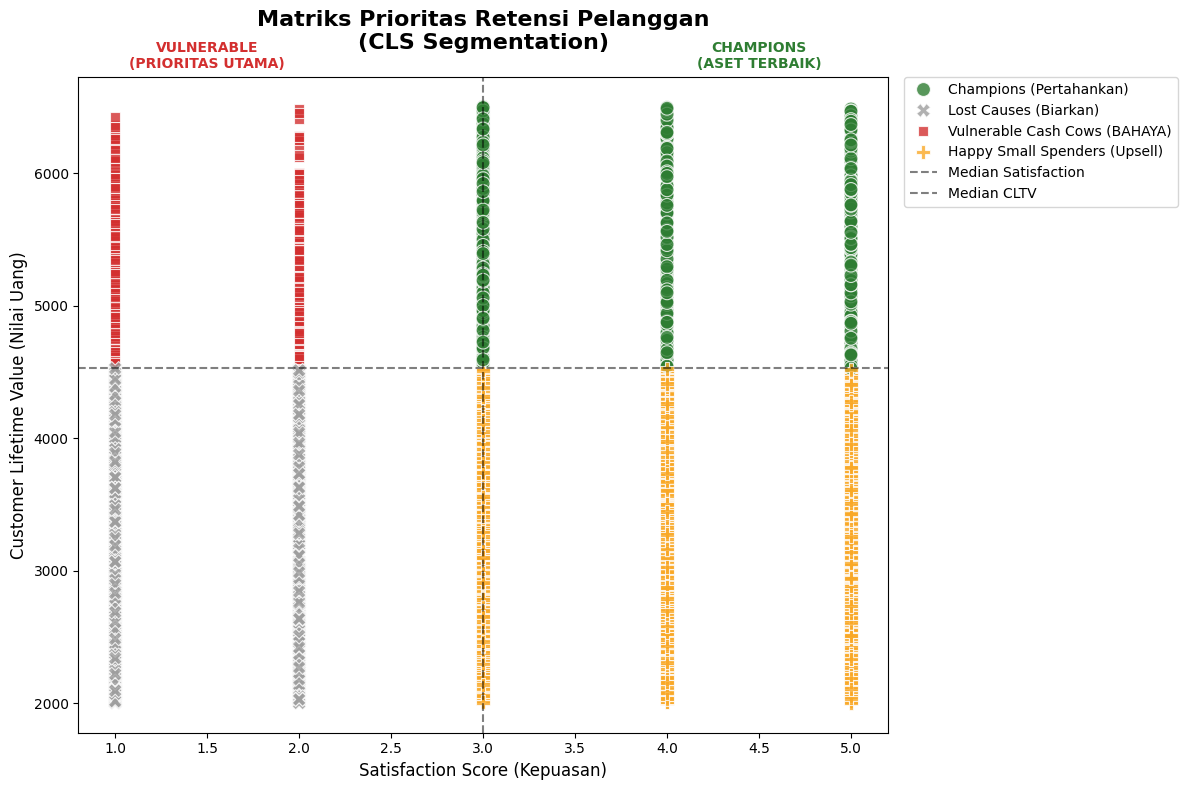

In [78]:
# Menggunakan df_status yang sudah kamu miliki
df_matrix = df_status.copy()

# Menentukan Titik Tengah (Threshold) otomatis berdasarkan Median data
# (Kamu bisa ganti manual misal: mid_sat = 3.0 jika ingin pakai skala tetap)
mid_sat = df_matrix['Satisfaction Score'].median()
mid_cltv = df_matrix['CLTV'].median()

# --- 2. LOGIKA SEGMENTASI (4 KUADRAN) ---
def get_priority_segment(row):
    if row['Satisfaction Score'] >= mid_sat and row['CLTV'] >= mid_cltv:
        return 'Champions (Pertahankan)'        # Puas & Mahal
    elif row['Satisfaction Score'] < mid_sat and row['CLTV'] >= mid_cltv:
        return 'Vulnerable Cash Cows (BAHAYA)'  # Kecewa & Mahal
    elif row['Satisfaction Score'] >= mid_sat and row['CLTV'] < mid_cltv:
        return 'Happy Small Spenders (Upsell)'  # Puas & Murah
    else:
        return 'Lost Causes (Biarkan)'          # Kecewa & Murah

# Terapkan fungsi ke dataframe
df_matrix['Segment'] = df_matrix.apply(get_priority_segment, axis=1)

# --- 3. VISUALISASI ---
plt.figure(figsize=(12, 8))

# Scatter Plot
sns.scatterplot(
    data=df_matrix,
    x='Satisfaction Score',
    y='CLTV',
    hue='Segment',
    style='Segment',
    s=100,  # Ukuran titik diperbesar agar jelas
    alpha=0.8,
    palette={
        'Champions (Pertahankan)': '#2E7D32',       # Hijau Tua
        'Vulnerable Cash Cows (BAHAYA)': '#D32F2F', # Merah Darah (Fokus Sini!)
        'Happy Small Spenders (Upsell)': '#F9A825', # Kuning Emas
        'Lost Causes (Biarkan)': '#9E9E9E'          # Abu-abu
    }
)

# Tambahkan Garis Pembatas Kuadran
plt.axvline(x=mid_sat, color='black', linestyle='--', alpha=0.5, label='Median Satisfaction')
plt.axhline(y=mid_cltv, color='black', linestyle='--', alpha=0.5, label='Median CLTV')

# Tambahkan Label Anotasi di Pojok Tiap Kuadran (Opsional, agar terlihat pro)
# Sesuaikan koordinat x,y sedikit jika tertutup titik
plt.text(x=mid_sat*0.5, y=mid_cltv*1.5, s="VULNERABLE\n(PRIORITAS UTAMA)",
         color='#D32F2F', fontweight='bold', ha='center', fontsize=10)
plt.text(x=mid_sat*1.5, y=mid_cltv*1.5, s="CHAMPIONS\n(ASET TERBAIK)",
         color='#2E7D32', fontweight='bold', ha='center', fontsize=10)

# Judul dan Label
plt.title('Matriks Prioritas Retensi Pelanggan\n(CLS Segmentation)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Satisfaction Score (Kepuasan)', fontsize=12)
plt.ylabel('Customer Lifetime Value (Nilai Uang)', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # Legenda di luar chart

plt.tight_layout()
plt.show()

### **PRIORITIZATION MATRIX: Siapa yang Harus Diselamatkan Duluan?**

Berdasarkan komponen pembentuk CLS (Satisfaction vs Value), kita membagi pelanggan menjadi 4 kuadran aksi.

#### 🧐 Strategi 4 Kuadran
1.  **🔴 Vulnerable (Kiri Atas):**
    * *Profil:* Bayar mahal (CLTV Tinggi) tapi kecewa (Satisfaction Rendah).
    * *Risiko:* Sangat Tinggi. Jika mereka pergi, revenue perusahaan akan anjlok drastis.
    * *Action:* **CODE RED.** Tim *Customer Success* wajib menghubungi mereka secara personal (telepon) dalam 24 jam. Tanyakan keluhan dan berikan kompensasi segera.

2.  **🟢 Champions (Kanan Atas):**
    * *Profil:* Bayar mahal dan sangat puas.
    * *Risiko:* Rendah.
    * *Action:* **Rewarding.** Jangan terlalu sering diganggu dengan iklan. Cukup berikan *surprise gift* atau akses layanan prioritas untuk menjaga ikatan emosional.

3.  **🟡 Happy Small Spenders (Kanan Bawah):**
    * *Profil:* Puas dengan layanan tapi paket langganannya murah.
    * *Action:* **Upselling.** Karena mereka sudah percaya (*trust*), tawarkan paket yang lebih tinggi atau fitur tambahan (Add-on). Mereka lebih mudah dikonversi daripada orang asing.

4.  **⚪ Lost Causes (Kiri Bawah):**
    * *Profil:* Sudah bayar murah, banyak komplain pula.
    * *Action:* **Ignore.** Jangan habiskan sumber daya mahal untuk segmen ini. Arahkan mereka ke layanan mandiri (*Self-service* / FAQ) daripada membebani staf CS.